# M2: Project 2

In this notebook we will be do multivariable analysis to develop a regression model that can predict the sale price of a property.

We will be using pandas for our data frame manipulation, seaborn and matplotlib for our plotting, numpy for math helpers, collections for dictionaries, scipy for our statistical analysis, patsy/statsmodels for our linear regression modeling, and sklearn for our fit analysis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
from collections import defaultdict
import scipy
import patsy
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

Configure the default axis label size to 18.  Ensure the plots generated have a high resolution (150dpi).

In [2]:
plt.rc("axes", labelsize=18)
plt.rc("figure", dpi=150, autolayout=True)

## Data Set

Load the cleaned output from the first project.

In [3]:
df = pd.read_feather("../m1p1b/csc5610-m2-Sacramento-real-estate-transactions-cleaned.feather")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      794 non-null    int64         
 1   address    794 non-null    object        
 2   city       794 non-null    category      
 3   zip        794 non-null    category      
 4   state      794 non-null    category      
 5   beds       794 non-null    int64         
 6   baths      794 non-null    int64         
 7   sq__ft     794 non-null    int64         
 8   type       794 non-null    category      
 9   sale_date  794 non-null    datetime64[ns]
 10  price      794 non-null    int64         
 11  latitude   794 non-null    float64       
 12  longitude  794 non-null    float64       
dtypes: category(4), datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 63.1+ KB


So we will be analyzing 794 records of data regarding sale price.

# Continuous Variable Analysis (Price)

We can compare price to the following columns for continuous analysis
* sq__ft
* latitude
* longitude

Note that while beds and baths are numerical values, because they are integral values with only about 5 distinct values they make for better categorical analysis.

## Square Footage vs. Price Analysis

[Text(0.5, 0, 'Square Footage'), Text(0, 0.5, 'Price (USD)')]

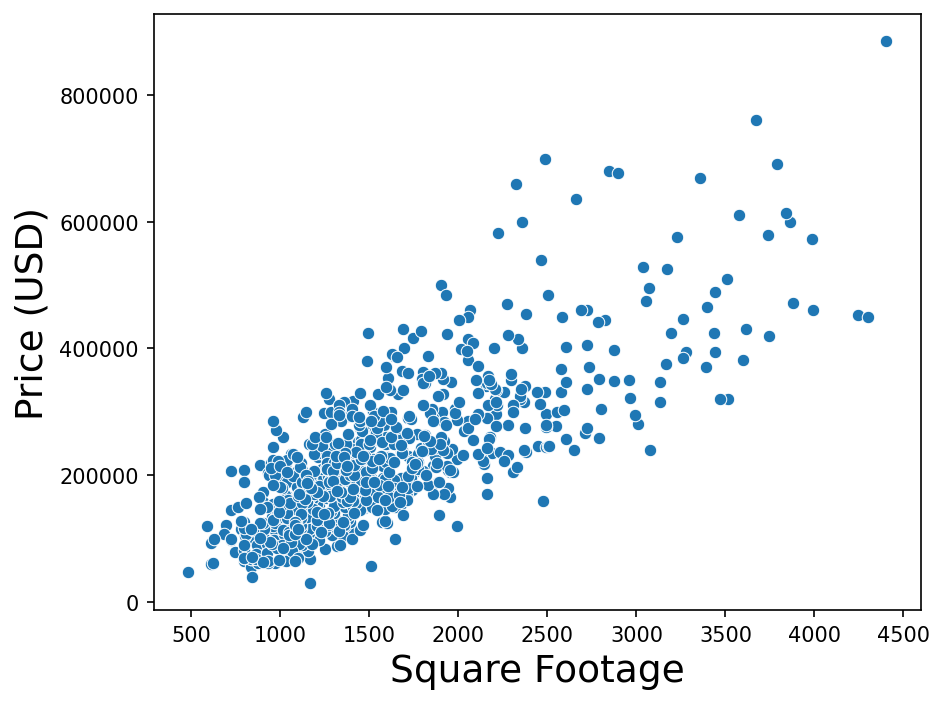

In [4]:
sq_ft_plot = sns.scatterplot(data=df, x="sq__ft", y="price")
sq_ft_plot.set(xlabel="Square Footage", ylabel="Price (USD)")

And the linear analysis

In [5]:
scipy.stats.linregress(df.price, df.sq__ft)

LinregressResult(slope=0.004372852291801698, intercept=601.0706041791153, rvalue=0.7781495213681995, pvalue=3.8758415565510652e-162, stderr=0.00012541615612172096, intercept_stderr=31.732029383686147)

This appears to be a good predictor.

## Latitude vs. Price Analysis

[Text(0.5, 0, 'Latitude'), Text(0, 0.5, 'Price (USD)')]

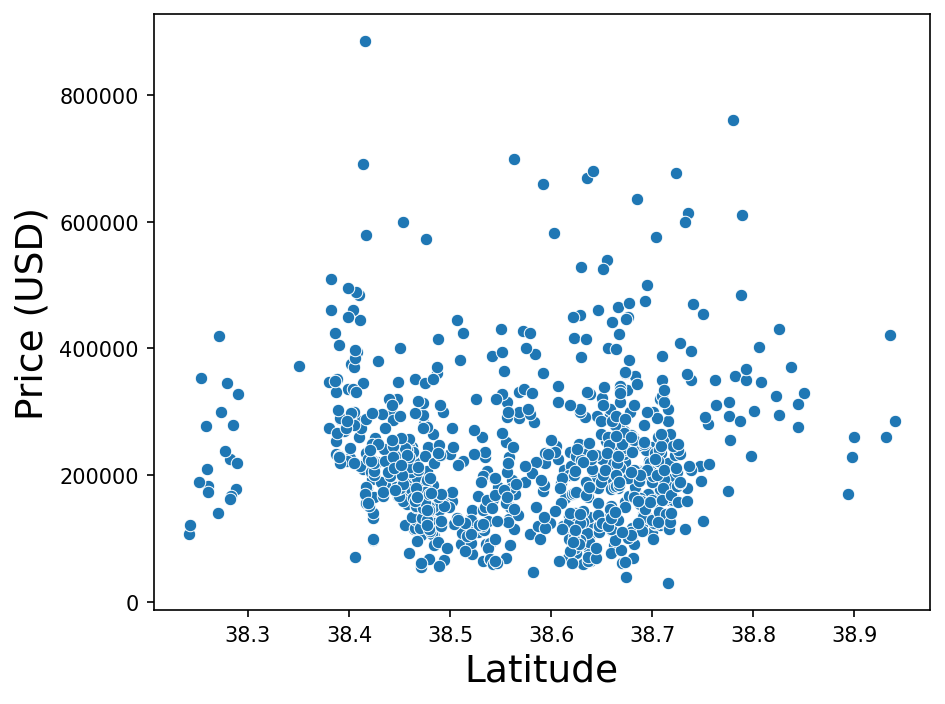

In [6]:
lat_plot = sns.scatterplot(data=df, x="latitude", y="price")
lat_plot.set(xlabel="Latitude", ylabel="Price (USD)")

In [7]:
scipy.stats.linregress(df.latitude, df.sq__ft)

LinregressResult(slope=-562.779536813326, intercept=23296.113887440897, rvalue=-0.10800164416270445, pvalue=0.0023083473164012794, stderr=184.0761698648461, intercept_stderr=7100.84628857426)

This does not appear to be good predictor.

## Longitude vs. Price Analysis

[Text(0.5, 0, 'Longitude'), Text(0, 0.5, 'Price (USD)')]

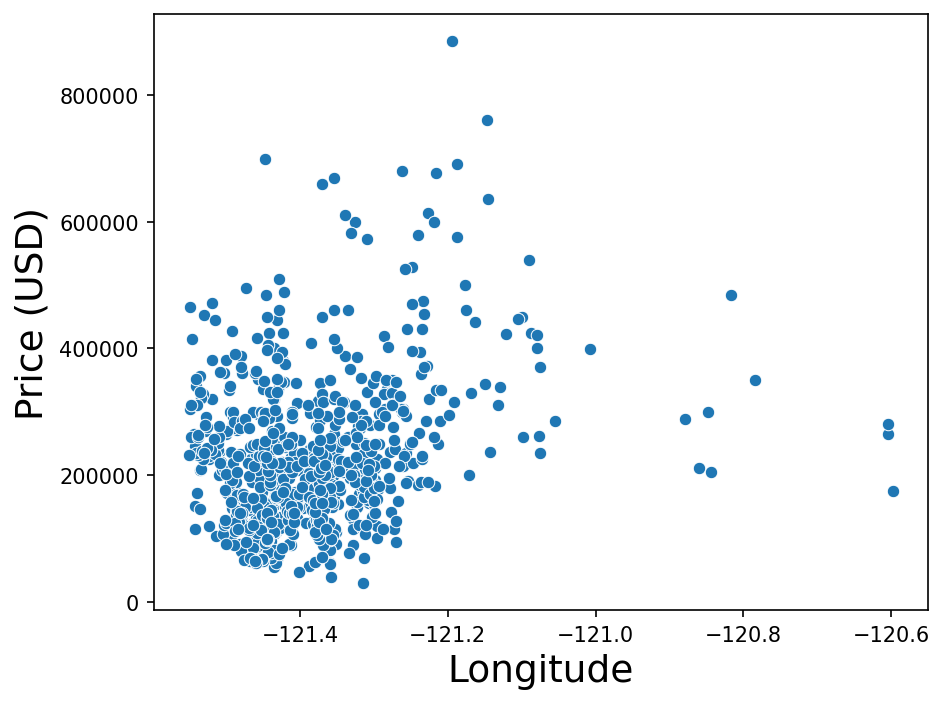

In [8]:
long_plot = sns.scatterplot(data=df, x="longitude", y="price")
long_plot.set(xlabel="Longitude", ylabel="Price (USD)")

In [9]:
scipy.stats.linregress(df.longitude, df.sq__ft)

LinregressResult(slope=681.2667929977241, intercept=84280.1096786246, rvalue=0.12046744053334134, pvalue=0.0006699763143814081, stderr=199.48512976668727, intercept_stderr=24213.888023735544)

This appears to be an okay predictor.

# Categorical Variable Analysis (Price)

We can compare price to the following columns for categorical analysis
* city
* zip
* beds
* baths
* type

## City vs. Price Analysis

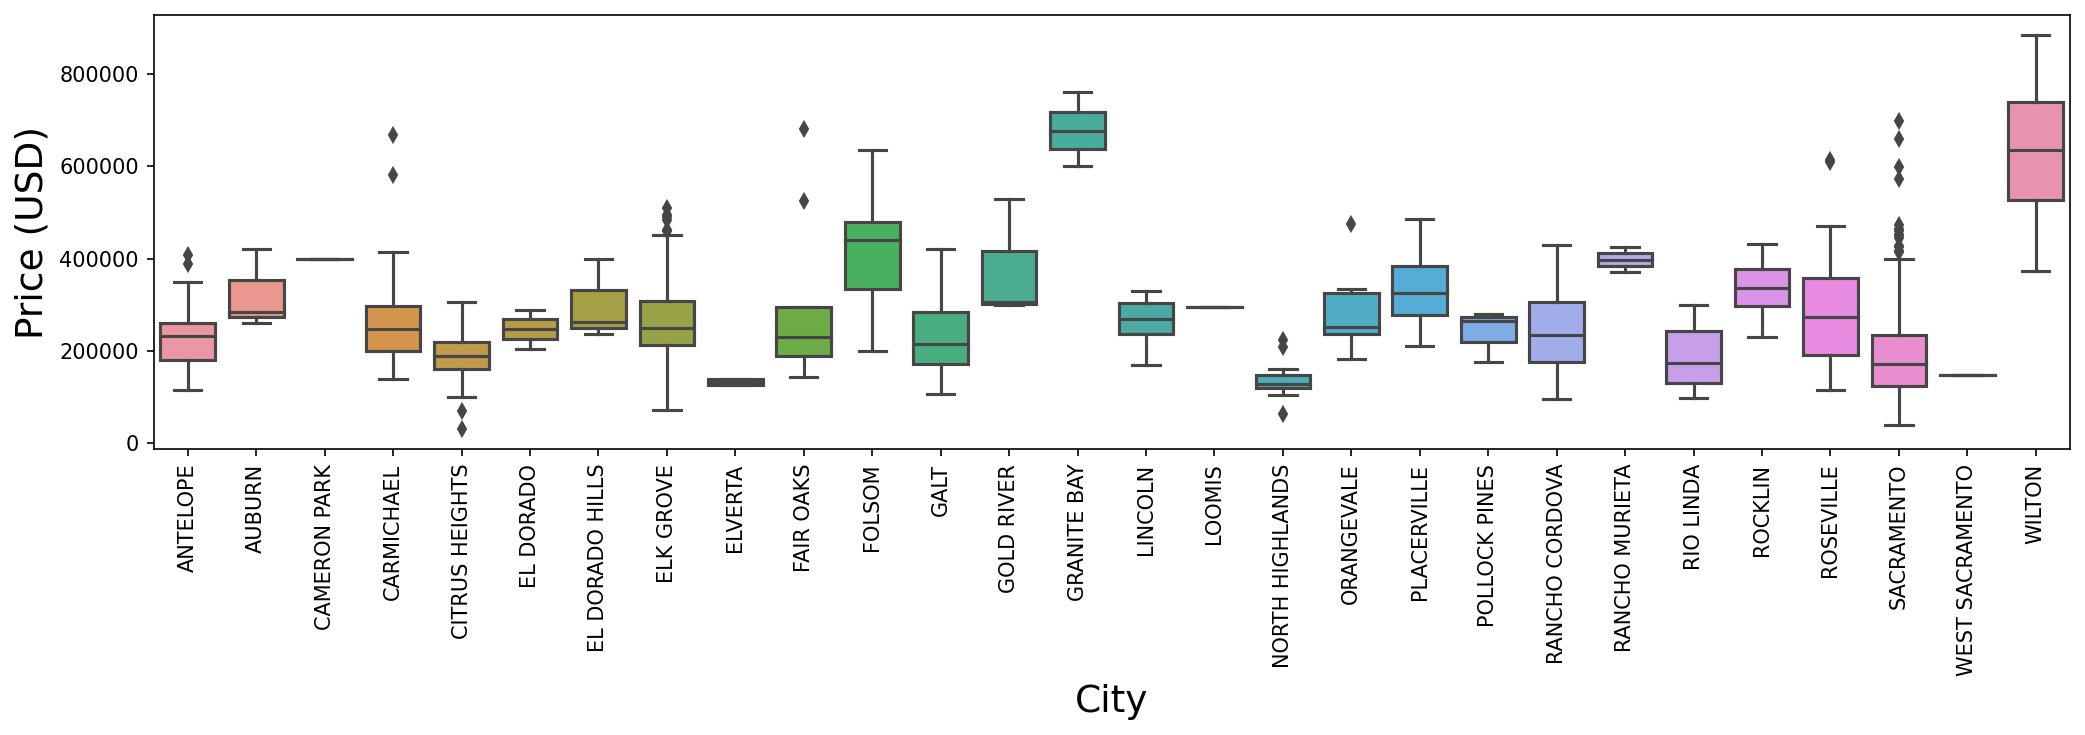

In [10]:
_, ax = plt.pyplot.subplots(figsize=(14, 5))
city_plot = sns.boxplot(data=df, x="city", y="price", ax=ax)
city_plot.set(xlabel="City", ylabel="Price (USD)");
city_plot.tick_params(axis="x", rotation=90)

In [11]:
scipy.stats.kruskal(*df.city.cat.categories.to_series().apply(lambda value: df.price[df.city == value].array))

KruskalResult(statistic=210.4983192423353, pvalue=2.453368806480581e-30)

This appears to be a good predictor.

## Zip vs. Price Analysis

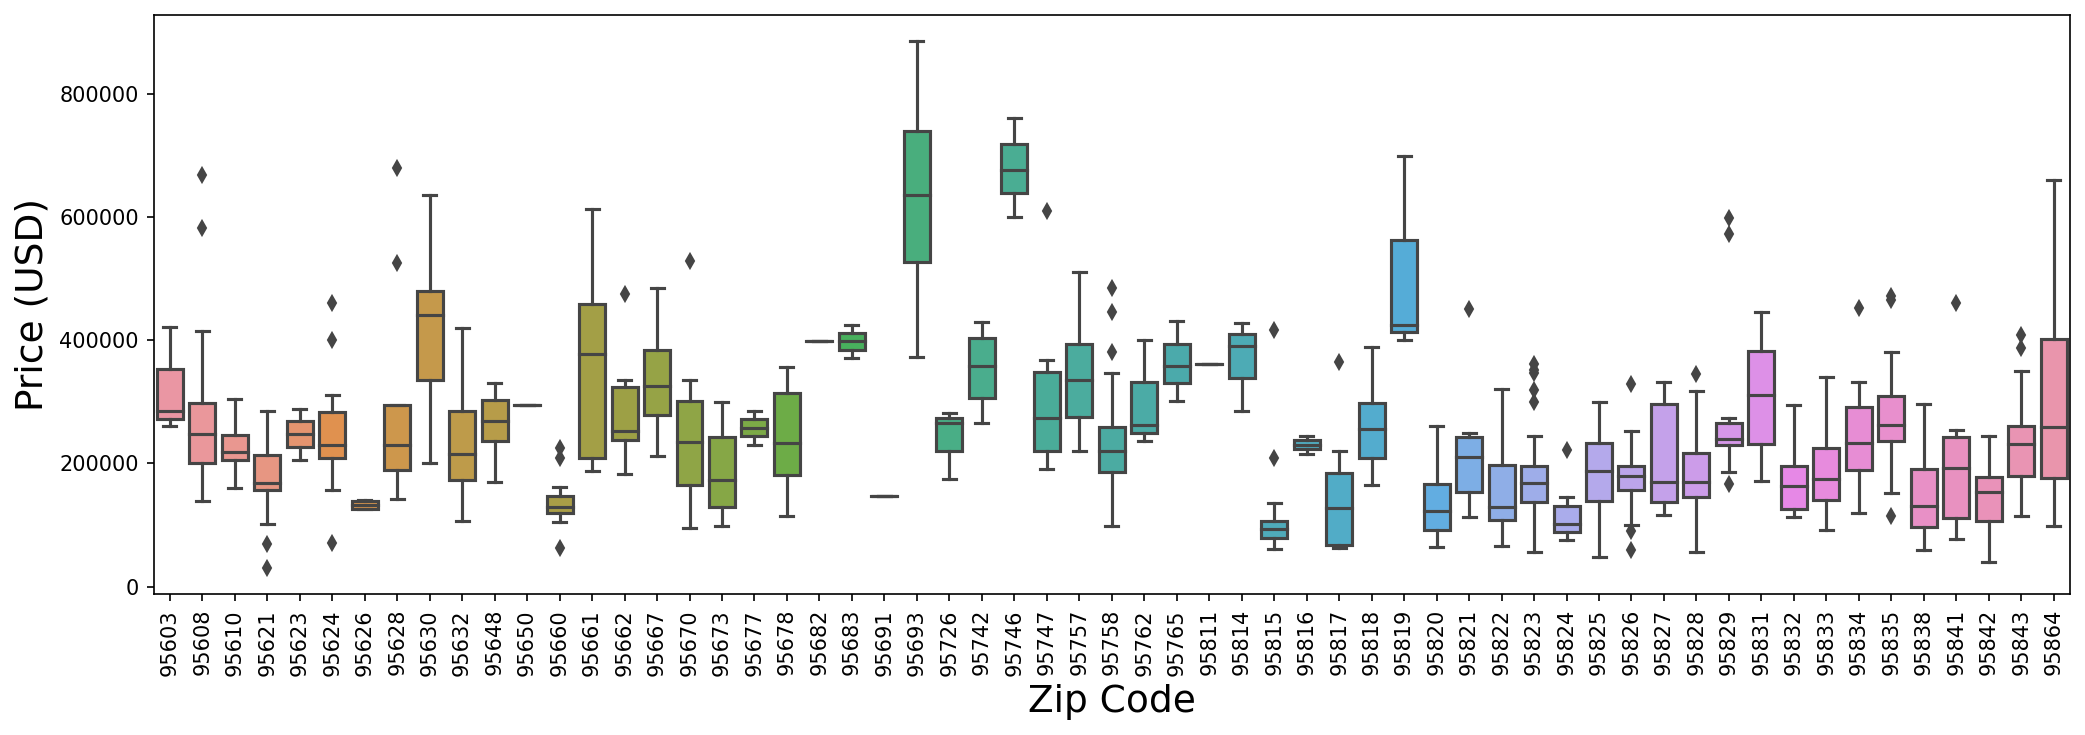

In [12]:
_, ax = plt.pyplot.subplots(figsize=(14, 5))
zip_plot = sns.boxplot(data=df, x="zip", y="price", ax=ax)
zip_plot.set(xlabel="Zip Code", ylabel="Price (USD)");
zip_plot.tick_params(axis="x", rotation=90)

In [13]:
scipy.stats.kruskal(*df.zip.cat.categories.to_series().apply(lambda value: df.price[df.zip == value].array))

KruskalResult(statistic=376.1567490767749, pvalue=3.8502223833887507e-48)

This appears to be a good predictor.

## Beds vs. Price Analysis

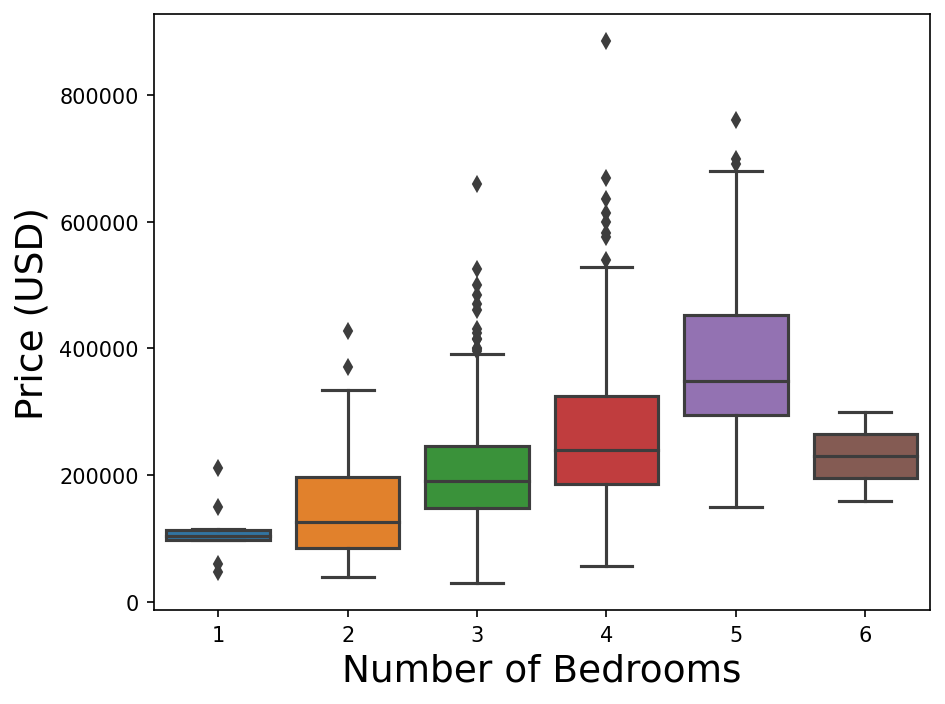

In [14]:
beds_plot = sns.boxplot(data=df, x="beds", y="price")
beds_plot.set(xlabel="Number of Bedrooms", ylabel="Price (USD)");

In [15]:
scipy.stats.kruskal(*pd.Series(df.beds.unique()).apply(lambda value: df.price[df.beds == value].array))

KruskalResult(statistic=204.30217145100872, pvalue=3.411433515370206e-42)

This appears to be a good predictor.

## Baths vs. Price Analysis

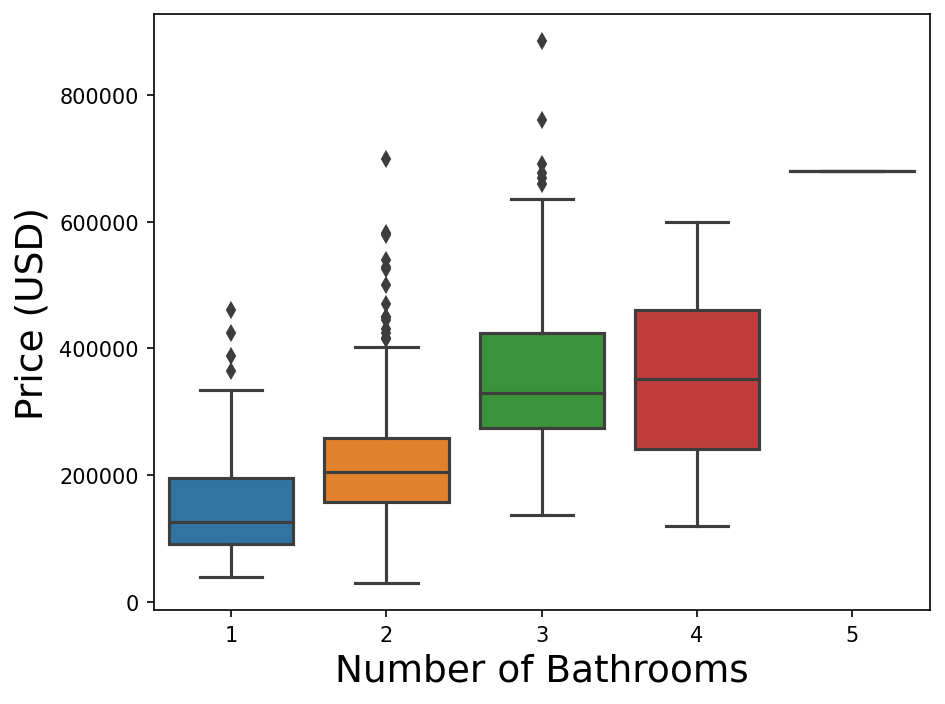

In [16]:
baths_plot = sns.boxplot(data=df, x="baths", y="price")
baths_plot.set(xlabel="Number of Bathrooms", ylabel="Price (USD)");

In [17]:
scipy.stats.kruskal(*pd.Series(df.baths.unique()).apply(lambda value: df.price[df.baths == value].array))

KruskalResult(statistic=253.18319698269218, pvalue=1.3421139741727966e-53)

This appears to be a good predictor.

## Type vs. Price Analysis

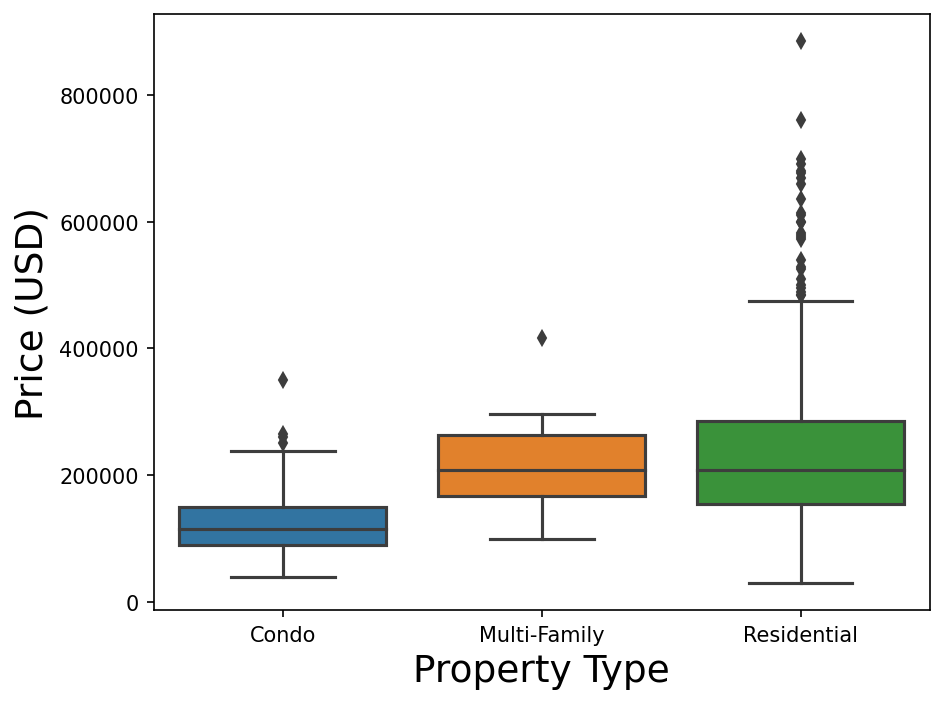

In [18]:
type_plot = sns.boxplot(data=df, x="type", y="price")
type_plot.set(xlabel="Property Type", ylabel="Price (USD)");

In [19]:
scipy.stats.kruskal(*df.type.cat.categories.to_series().apply(lambda value: df.price[df.type == value].array))

KruskalResult(statistic=40.96790317206112, pvalue=1.270377691216139e-09)

This appears to be an okay predictor.

# Continuous Variable Analysis (Property Type)

We can compare the property type to the following continuous variables:
* price
* sq__ft* latitude
* 
longitude

## Price vs. Property Type Analysis

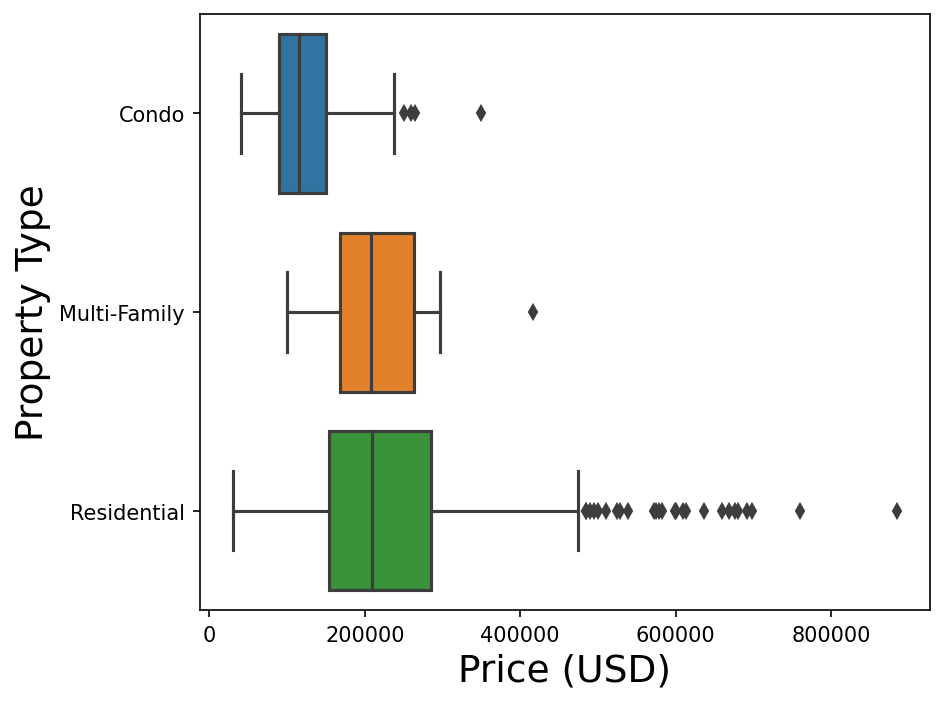

In [20]:
price_type_plot = sns.boxplot(data=df, x="price", y="type")
price_type_plot.set(xlabel="Price (USD)", ylabel="Property Type");

In [21]:
scipy.stats.kruskal(*df.type.cat.categories.to_series().apply(lambda value: df.price[df.type == value].array))

KruskalResult(statistic=40.96790317206112, pvalue=1.270377691216139e-09)

This appears to be an okay predictor.

## Square Footage vs. Property Type Analysis

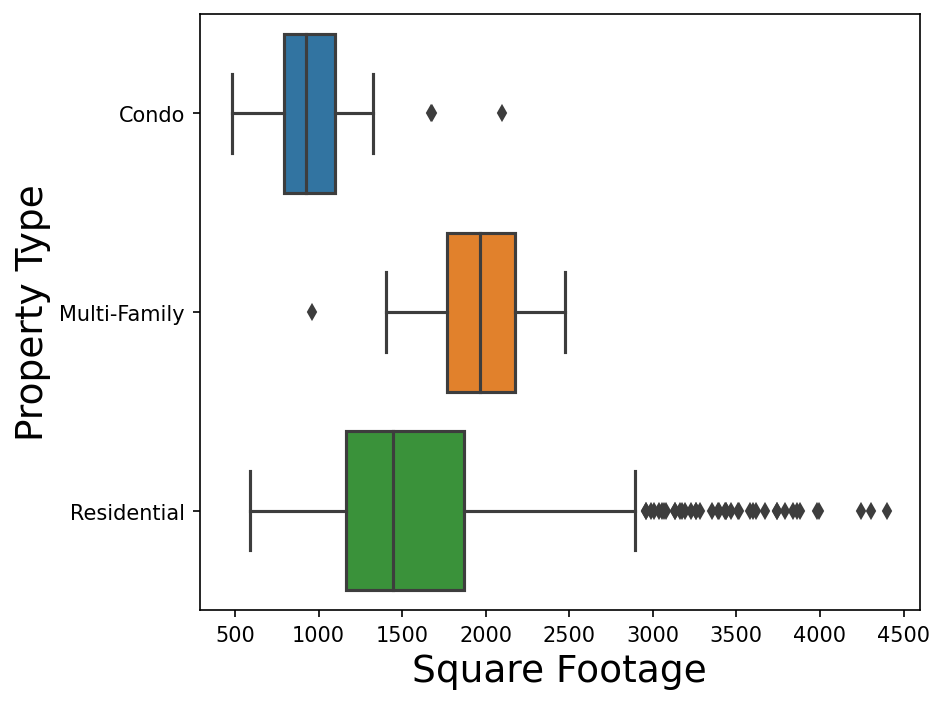

In [22]:
sq_ft_type_plot = sns.boxplot(data=df, x="sq__ft", y="type")
sq_ft_type_plot.set(xlabel="Square Footage", ylabel="Property Type");

In [23]:
scipy.stats.kruskal(*df.type.cat.categories.to_series().apply(lambda value: df.sq__ft[df.type == value].array))

KruskalResult(statistic=67.53751863189704, pvalue=2.159803140666038e-15)

This appears to be a good predictor.

## Latitude vs. Property Type Analysis

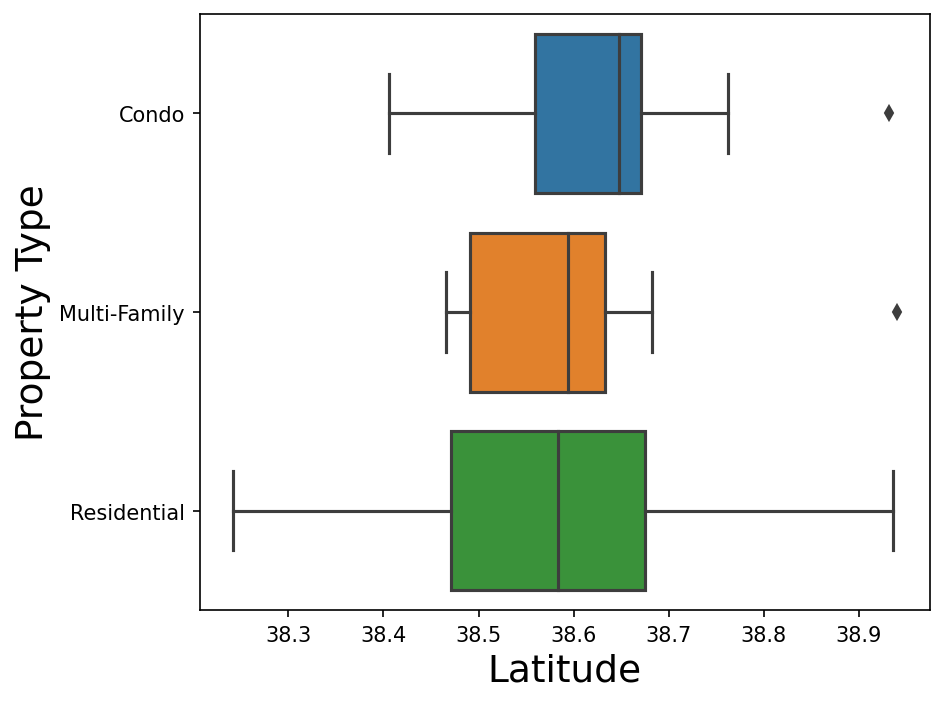

In [24]:
lat_type_plot = sns.boxplot(data=df, x="latitude", y="type")
lat_type_plot.set(xlabel="Latitude", ylabel="Property Type");

In [25]:
scipy.stats.kruskal(*df.type.cat.categories.to_series().apply(lambda value: df.latitude[df.type == value].array))

KruskalResult(statistic=4.082470277114968, pvalue=0.1298682065469892)

This does not appear to be a good predictor.

## Longitude vs. Property Type Analysis

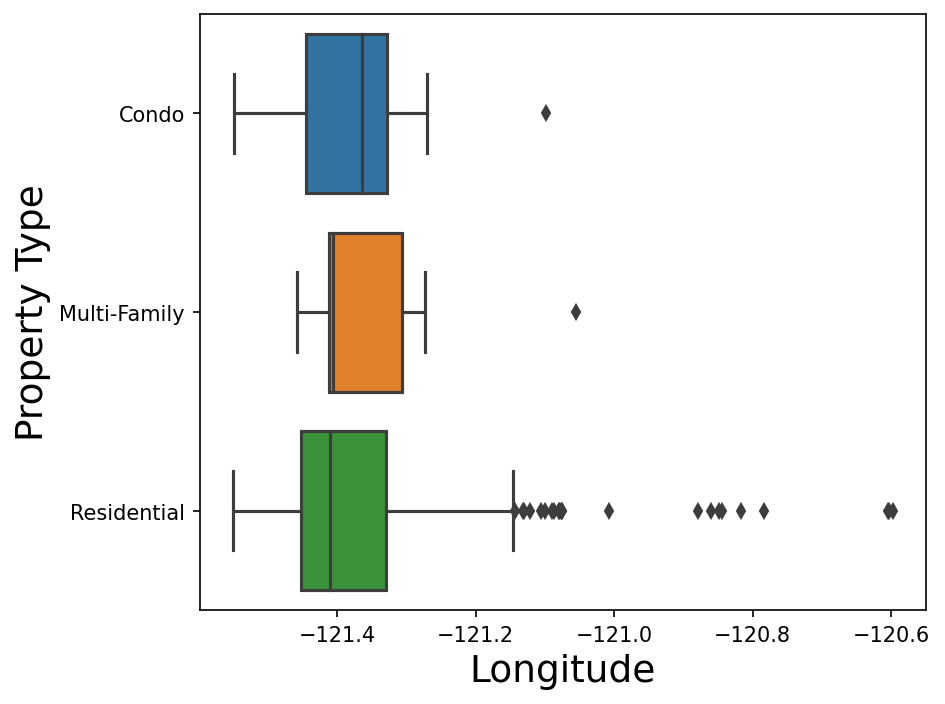

In [26]:
long_type_plot = sns.boxplot(data=df, x="longitude", y="type")
long_type_plot.set(xlabel="Longitude", ylabel="Property Type");

In [27]:
scipy.stats.kruskal(*df.type.cat.categories.to_series().apply(lambda value: df.longitude[df.type == value].array))

KruskalResult(statistic=1.7787734051580741, pvalue=0.4109076841129423)

This does not appear to be a good predictor.

# Categorical Variable Analysis (Property Type)

We can compare the property type to the following categorical variables:
* city
* zip
* beds
* baths

## City vs. Property Type Analysis

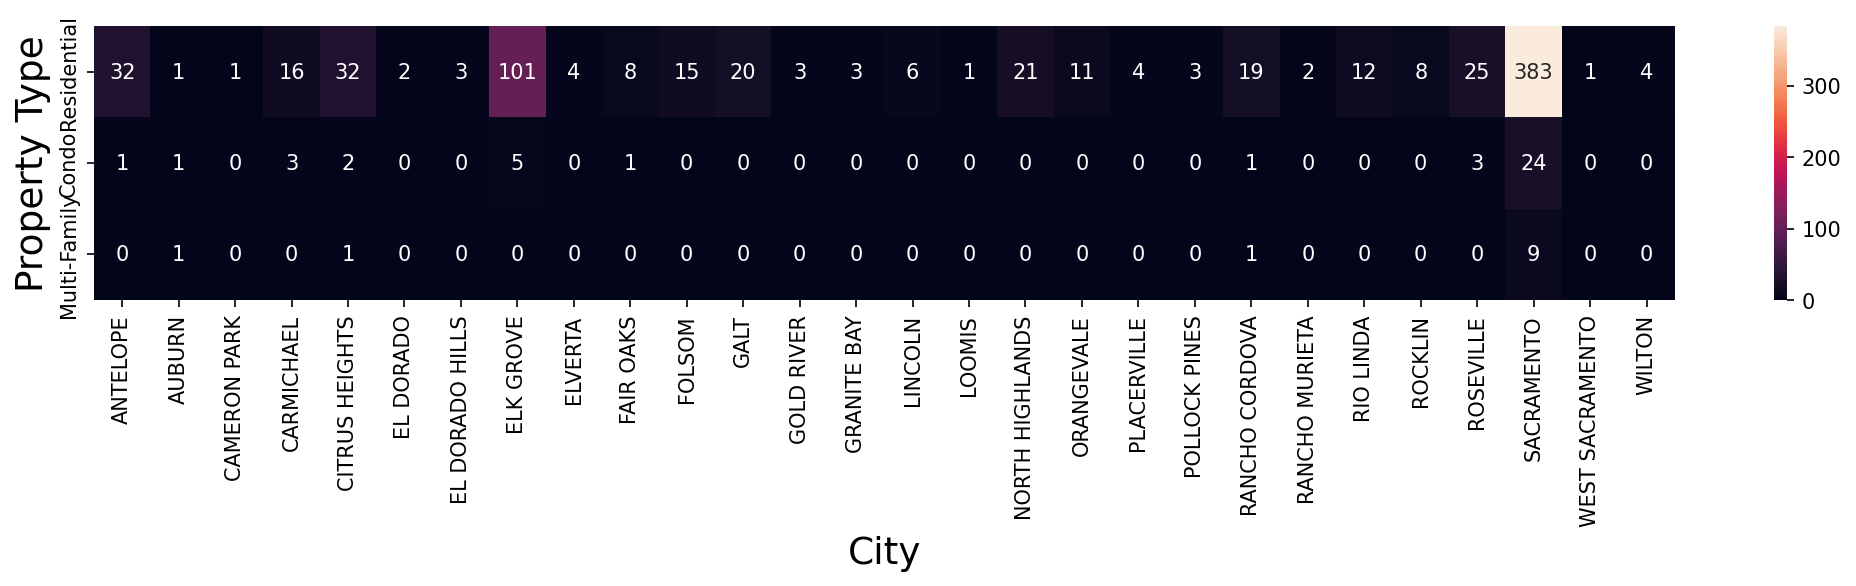

In [28]:
city_type = defaultdict(lambda: defaultdict(int))
for index, row in df.iterrows():
    city_type[row.city][row.type] += 1
_, ax = plt.pyplot.subplots(figsize=(14, 4))
city_type_heat = sns.heatmap(pd.DataFrame.from_dict(city_type).sort_index(axis=1).fillna(0), annot=True, fmt=".0f", ax=ax)
city_type_heat.set(xlabel="City", ylabel="Property Type");

In [29]:
chi2, p, _, _ = scipy.stats.chi2_contingency(df[["city", "type"]].groupby(by=["city", "type"]).size().unstack(level=0))
print(f"chi2={chi2}, p={p}")

chi2=48.26803546298892, p=0.6941290940534962


This does not appear to be a good predictor.

## Zip vs. Property Type Analysis

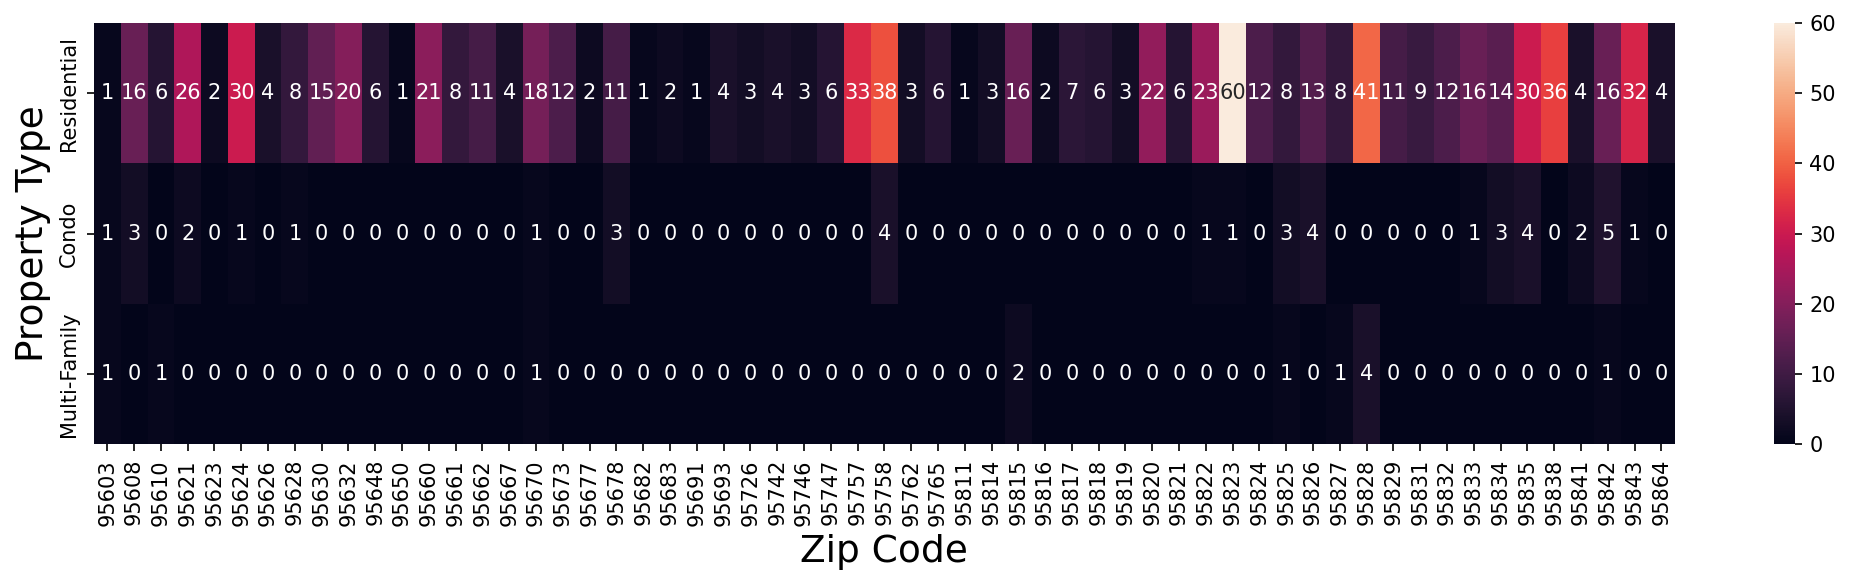

In [30]:
zip_type = defaultdict(lambda: defaultdict(int))
for index, row in df.iterrows():
    zip_type[row.zip][row.type] += 1
_, ax = plt.pyplot.subplots(figsize=(14, 4))
zip_type_heat = sns.heatmap(pd.DataFrame.from_dict(zip_type).sort_index(axis=1).fillna(0), annot=True, fmt=".0f", ax=ax)
zip_type_heat.set(xlabel="Zip Code", ylabel="Property Type");

In [31]:
chi2, p, _, _ = scipy.stats.chi2_contingency(df[["zip", "type"]].groupby(by=["zip", "type"]).size().unstack(level=0))
print(f"chi2={chi2}, p={p}")

chi2=174.55950750710994, p=0.00036003926324442776


This appears to be an okay predictor.

## Beds vs. Property Type Analysis

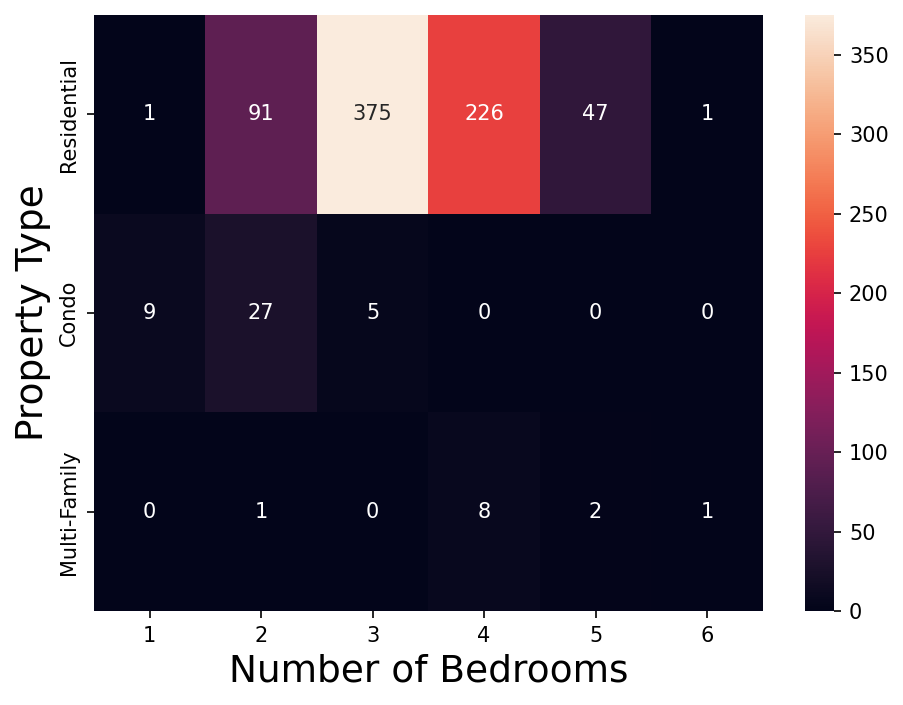

In [32]:
beds_type = defaultdict(lambda: defaultdict(int))
for index, row in df.iterrows():
    beds_type[row.beds][row.type] += 1
beds_type_heat = sns.heatmap(pd.DataFrame.from_dict(beds_type).sort_index(axis=1).fillna(0), annot=True, fmt=".0f")
beds_type_heat.set(xlabel="Number of Bedrooms", ylabel="Property Type");

In [33]:
chi2, p, _, _ = scipy.stats.chi2_contingency(df[["beds", "type"]].groupby(by=["beds", "type"]).size().unstack(level=0))
print(f"chi2={chi2}, p={p}")

chi2=293.8460455250152, p=3.105946362678771e-57


This appears to be a good predictor.

## Baths vs. Property Type Analysis

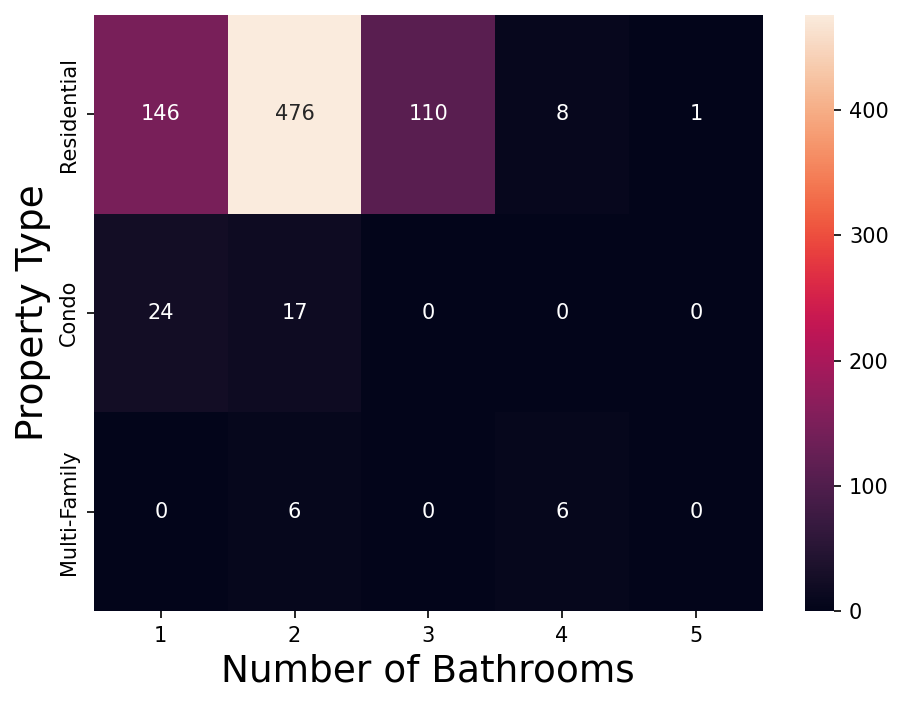

In [34]:
baths_type = defaultdict(lambda: defaultdict(int))
for index, row in df.iterrows():
    baths_type[row.baths][row.type] += 1
baths_type_heat = sns.heatmap(pd.DataFrame.from_dict(baths_type).sort_index(axis=1).fillna(0), annot=True, fmt=".0f")
baths_type_heat.set(xlabel="Number of Bathrooms", ylabel="Property Type");

In [35]:
chi2, p, _, _ = scipy.stats.chi2_contingency(df[["baths", "type"]].groupby(by=["baths", "type"]).size().unstack(level=0))
print(f"chi2={chi2}, p={p}")

chi2=202.47941902416085, p=1.91860608202184e-39


This appears to be a good predictor.

# Linear Regression Model (Price)

We will use type, beds, baths, sq__ft, latitude, and longitude (independent variables) to predict sale price (dependent variable).
* Note that it has been suggested that we use thousands-of-square-feet (`sq__ft_k`) to bring the scale of the column into line with other variables.
* We will also be introducing a variable `beds_t_baths` which is the product of `beds * baths`
  * Note that this represents the combined weight of increasing both beds and baths instead of just one.
* We will also be introducing a variable `beds_m_baths` which is the difference of `beds - baths`
  * Note that this represents the weight for the number of bedrooms without dedicated bathrooms.

We will use patsy to set up our data into the proper matrix form.

In [36]:
df["sq__ft_k"] = df.sq__ft / 1000.0
df["beds_t_baths"] = df.beds * df.baths
df["beds_m_baths"] = df.beds - df.baths
y, X = patsy.dmatrices("price ~ type + beds + baths + beds_t_baths + beds_m_baths + sq__ft_k + latitude + longitude", data=df, return_type="dataframe")
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794 entries, 0 to 793
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Intercept             794 non-null    float64
 1   type[T.Multi-Family]  794 non-null    float64
 2   type[T.Residential]   794 non-null    float64
 3   beds                  794 non-null    float64
 4   baths                 794 non-null    float64
 5   beds_t_baths          794 non-null    float64
 6   beds_m_baths          794 non-null    float64
 7   sq__ft_k              794 non-null    float64
 8   latitude              794 non-null    float64
 9   longitude             794 non-null    float64
dtypes: float64(10)
memory usage: 68.2 KB


We can see that the property type categorical variable was split into multiple types and that an intercept column was added.

Now we will use the statsmodels library to optimize for least square and analyze the resulting fit summary.

In [37]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          2.27e-178
Time:                        20:49:36   Log-Likelihood:                -9949.8
No. Observations:                 794   AIC:                         1.992e+04
Df Residuals:                     785   BIC:                         1.996e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.693e+07   3.06e+06      5.528      0.000    1.09e+07    2.29e+07
type[T.Multi-Family] -1.546e+04   2.36e+04     -0.656      0.512   -6.17e+04    3.08e+04
type[T.Residential]   2.214e+04   1.21e+04      1.831      0.067   -1591.274    4.59e+04
beds                  1.734e+04   9588.083      1.809      0.071   -1477.646    3.62e+04
baths                 3.073e+04   1.14e+04      2.696      0.007    8358.128    5.31e+04
beds_t_baths         -1.224e+04   3815.170     -3.207      0.001   -1.97e+04   -4747.519
beds_m_baths         -1.338e+04   3189.018     -4.197      0.000   -1.96e+04   -7123.157
sq__ft_k              1.547e+05   6369.759     24.288      0.000    1.42e+05    1.67e+05
latitude              6.287e+04   2.06e+04      3.055      0.002    2.25e+04    1.03e+05
longitude               1.6e+05   2.23e+04      7.163      0.000    1.16e+05    2.04e+05
==============================================================================
Omnibus:                      159.815   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.664
Skew:                           1.039   Prob(JB):                     1.82e-89
Kurtosis:                       5.835   Cond. No.                     3.31e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We have a high Cond. No. which could indicate collinearity between some of the independent columns.  Let us look at pairwise scatterplots.

C:\Save\School\CS5610\cs5610\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


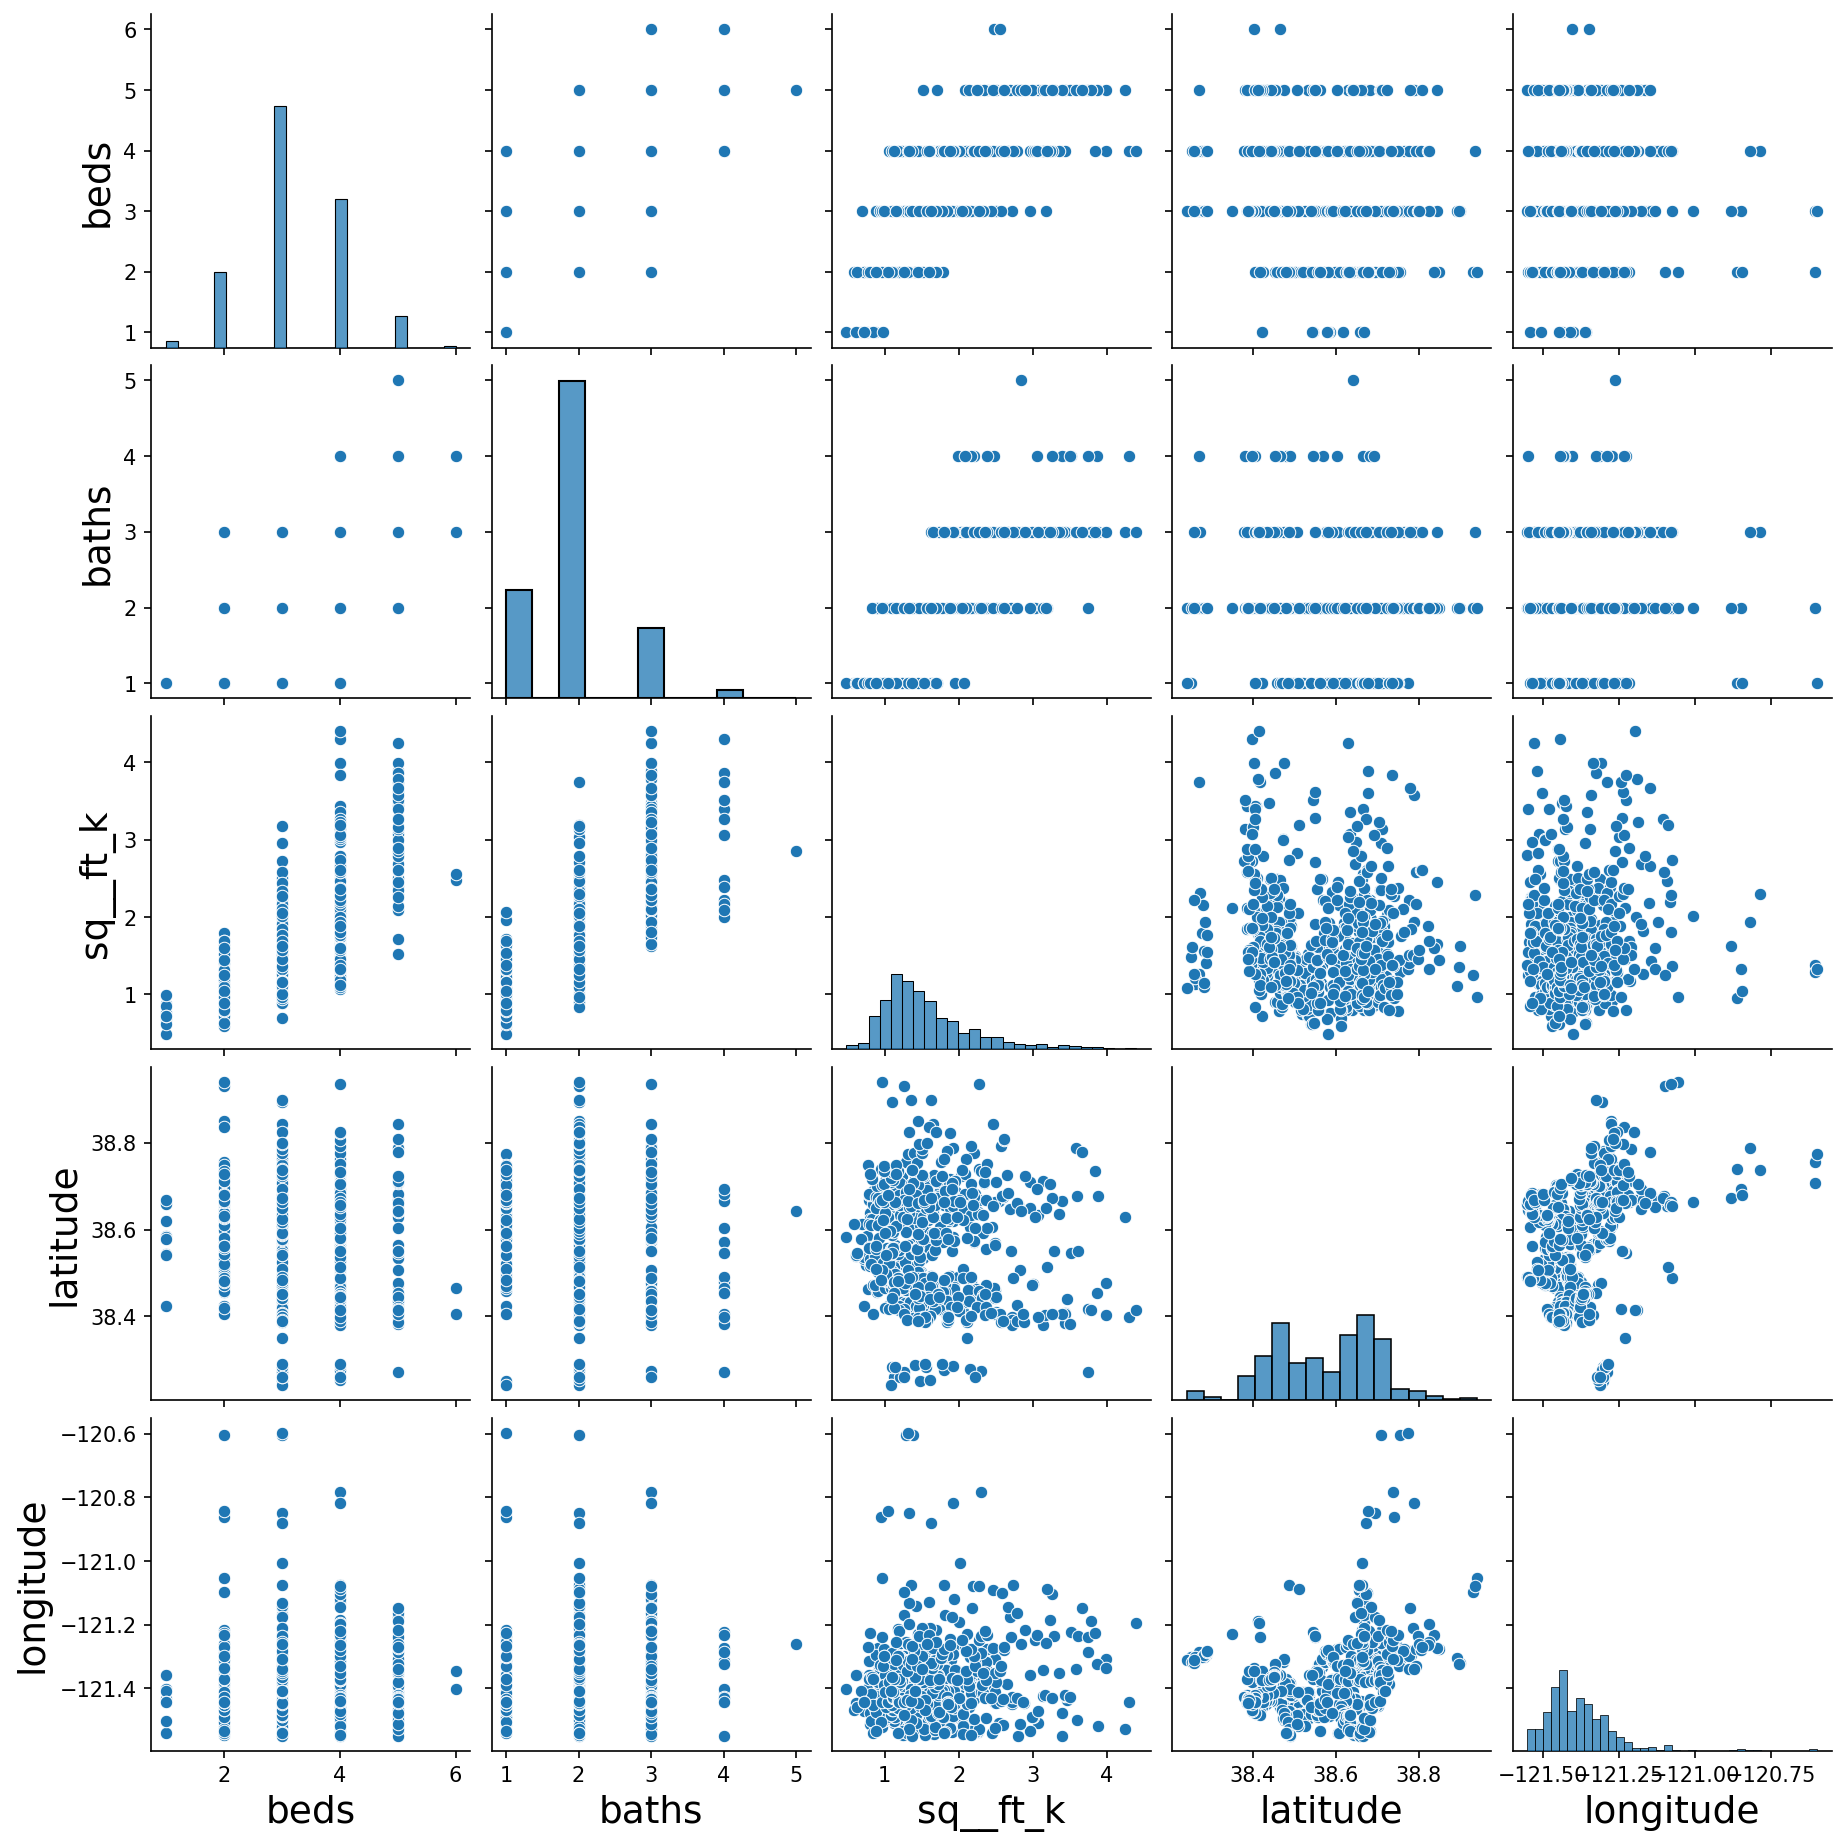

In [38]:
pair_plot = sns.pairplot(data=df, vars=["beds", "baths", "sq__ft_k", "latitude", "longitude"])

We can see a slight correlation between beds, baths, and sq__ft_k.  This logically makes sense since you would expect more of a given type of room in a larger house and you would expect similarly sized houses to have a similar count of rooms.  However, I don't think this means we want to remove any of these variables from our regression model.

The high collinearity is likely due to beds/beds/beds*baths/beds-baths and the facts that beds/baths both correlate with square footage.

Overall the adjusted R-squared value is okay (0.657) and that the global Prob(F-stat) indicates there is a good underlying linear relationship.

From the column breakdown, we can see that Multi-Family is a bad predictor but Residential is a good predictor.

Let us limit the original data to just residential properties.

In [39]:
filtered_df = df[lambda row: row.type == "Residential"].copy()
y, X = patsy.dmatrices("price ~ beds + baths + beds_t_baths + beds_m_baths + sq__ft_k + latitude + longitude - 1", data=filtered_df, return_type="dataframe")
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              1572.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):                        0.00
Time:                        20:49:40   Log-Likelihood:                         -9311.1
No. Observations:                 741   AIC:                                  1.863e+04
Df Residuals:                     735   BIC:                                  1.866e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
beds          2.091e+04   1.12e+04      1.873      0.061   -1009.447    4.28e+04
baths         3.506e+04   1.33e+04      2.642      0.008    9003.077    6.11e+04
beds_t_baths -1.307e+04   4484.200     -2.915      0.004   -2.19e+04   -4268.556
beds_m_baths -1.415e+04   3521.302     -4.018      0.000   -2.11e+04   -7234.415
sq__ft_k      1.566e+05   6705.533     23.353      0.000    1.43e+05     1.7e+05
latitude      1.237e+05   1.83e+04      6.743      0.000    8.77e+04     1.6e+05
longitude     3.973e+04   5840.939      6.803      0.000    2.83e+04    5.12e+04
==============================================================================
Omnibus:                      131.177   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.312
Skew:                           0.954   Prob(JB):                     3.72e-66
Kurtosis:                       5.474   Cond. No.                     4.13e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 7.07e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The adjusted R-squared actually went down just a bit (0.651) but the P>|t| values all look good for the remaining 741 rows.  Note that while the p-value for beds is 0.100 it is being retained to preserve the hierarchy with the adjusted `beds_t_baths` and `beds_m_baths` variables.

Let us plot the predicted vs. the true value.

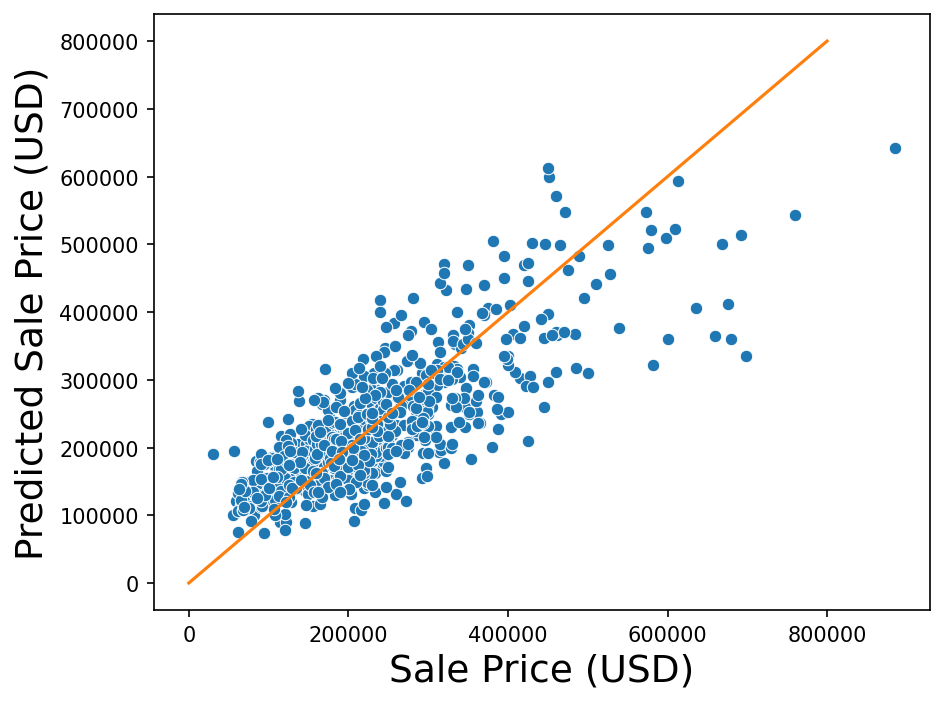

In [40]:
pred_y = results.predict(X)
pred_true_plot = sns.scatterplot(x=y.price, y=pred_y)
plt.pyplot.plot([0, 800000], [0, 800000], color="tab:orange")
pred_true_plot.set(xlabel="Sale Price (USD)", ylabel="Predicted Sale Price (USD)");

We can see a strong linear relationship between the true sale price and our predicted sale price.

In [41]:
mse = mean_squared_error(y.price, pred_y)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y.price, pred_y)
print(f"RMSE (USD): ${rmse:,.0f}, MAPE: {mape:.1%}")

RMSE (USD): $69,333, MAPE: 26.8%


We have a root mean-squared error of about $68k and a mean absolute %error of 25.9%.

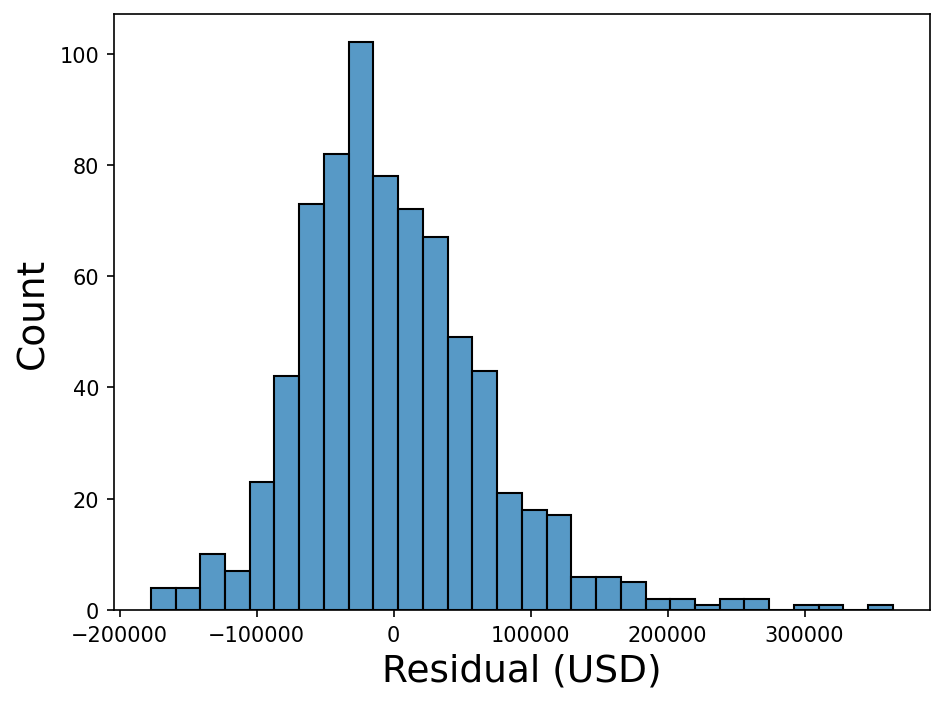

In [42]:
residuals_hist_plot = sns.histplot(x=results.resid)
residuals_hist_plot.set(xlabel="Residual (USD)", ylabel="Count");

Our residual histogram plot looks normal-ish; but perhaps a bit skewed to the left.

In [43]:
scipy.stats.shapiro(results.resid)

ShapiroResult(statistic=0.9562456011772156, pvalue=4.7737953591227636e-14)

Our p-value indicates this is not normally distributed.

In [44]:
np.mean(results.resid)

11.190068321623029

We have a mean error of approximately zero.

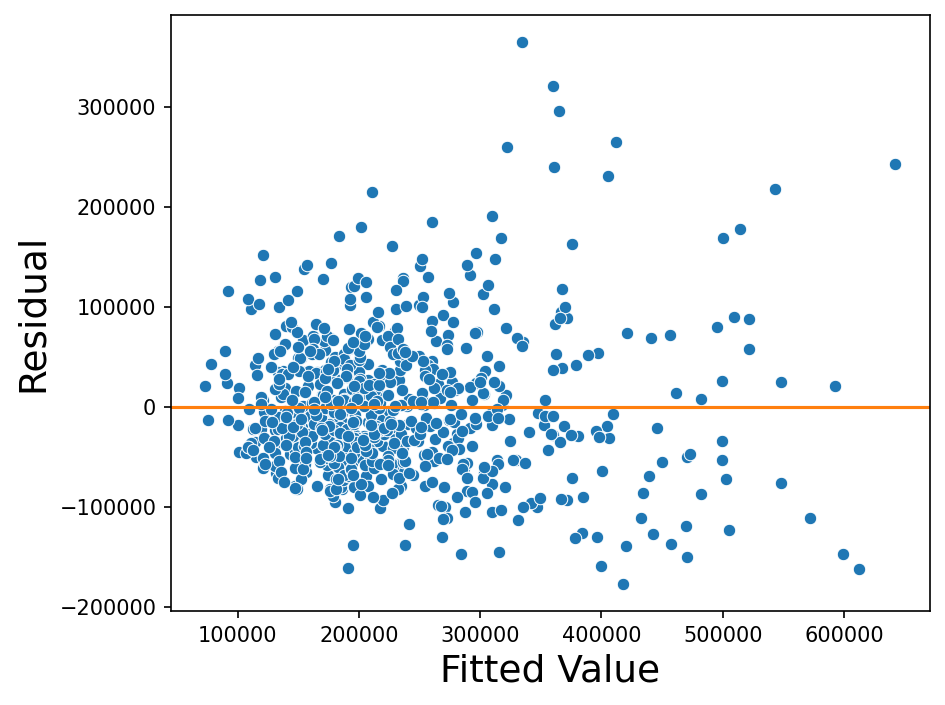

In [45]:
residuals_fit_plot = sns.scatterplot(x=results.fittedvalues, y=results.resid)
plt.pyplot.axhline(y=0, color="tab:orange")
residuals_fit_plot.set(xlabel="Fitted Value", ylabel="Residual");

This shows that are residual error is becoming more erratic as our fitted value goes up.
This means that our model is worse at predicting the more expensive properties.

# Linear Regression Model (log(Price))

Our error distribution appeared to be left-skewed.
Also, our residual error increased in variance as our fitted value grew.
From our previous notebook we saw a strong possibility that price had a power law distribution.
Let us switch our model to predict the log of the price.

In [46]:
log_df = filtered_df.copy()
log_df["log_price"] = np.log(log_df.price)
y, X = patsy.dmatrices("log_price ~ beds + baths + beds_t_baths + beds_m_baths + sq__ft_k + latitude + longitude", data=log_df, return_type="dataframe")
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     180.5
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          7.76e-141
Time:                        20:49:41   Log-Likelihood:                -177.83
No. Observations:                 741   AIC:                             369.7
Df Residuals:                     734   BIC:                             401.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       87.3542     14.355      6.085      0.000      59.173     115.536
beds             0.3318      0.050      6.686      0.000       0.234       0.429
baths            0.4276      0.059      7.248      0.000       0.312       0.543
beds_t_baths    -0.1363      0.020     -6.838      0.000      -0.175      -0.097
beds_m_baths    -0.0958      0.016     -6.122      0.000      -0.127      -0.065
sq__ft_k         0.5568      0.030     18.562      0.000       0.498       0.616
latitude         0.1923      0.097      1.988      0.047       0.002       0.382
longitude        0.6946      0.105      6.626      0.000       0.489       0.900
==============================================================================
Omnibus:                       32.343   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.911
Skew:                          -0.213   Prob(JB):                     8.92e-17
Kurtosis:                       4.487   Cond. No.                     3.40e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We have a lower adjusted R-squared value (0.593).

## Analysis of Coefficients

While the following fitness tests all say this is a good model, I don't know how to do single variable analysis of the coefficients.  For example, if I just look at `sq__ft_k` (thousands of square feet), then holding all else constant an increase of 1000 sq. ft. will increase the log(Price) by 0.5568.  However, I can't just do `np.exp(0.5568)` to translate that back to dollars.

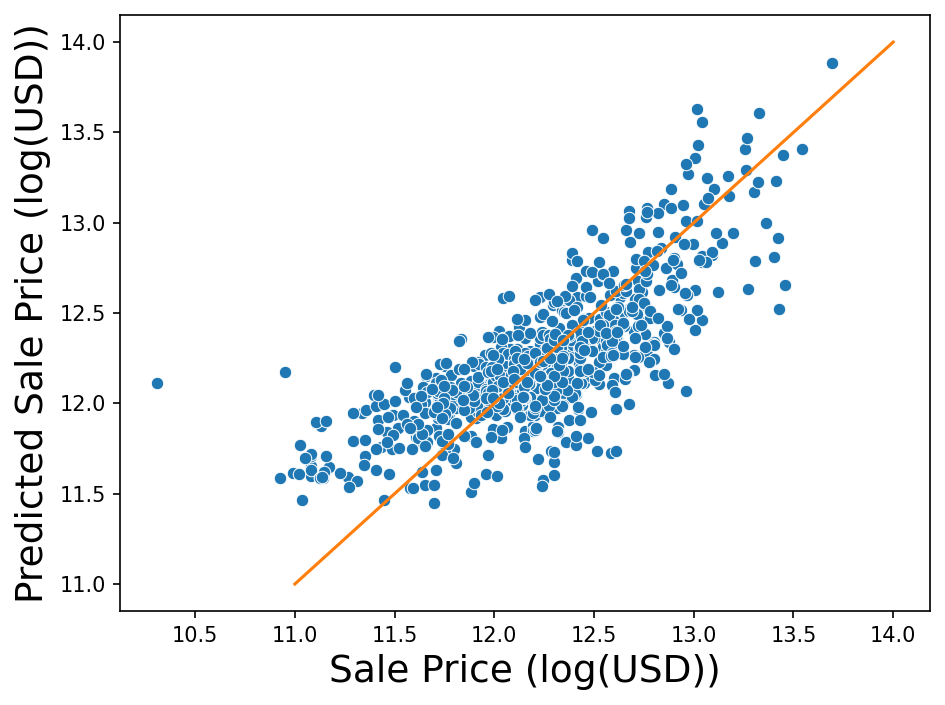

In [47]:
pred_y = results.predict(X)
pred_true_plot = sns.scatterplot(x=y.log_price, y=pred_y)
plt.pyplot.plot([11, 14], [11, 14], color="tab:orange")
pred_true_plot.set(xlabel="Sale Price (log(USD))", ylabel="Predicted Sale Price (log(USD))");

We still have a strong linear relationship (but posssibly with a few outliers still).

In [48]:
log_df[lambda row: row.log_price < 11]

,index,address,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,sq__ft_k,beds_t_baths,beds_m_baths,log_price
0,0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879,0.836,2,1,10.989048
69,605,15 LOORZ CT,SACRAMENTO,95823,CA,2,1,838,Residential,2008-05-16,55422,38.471646,-121.435158,0.838,2,1,10.922732
293,867,7401 TOULON LN,SACRAMENTO,95828,CA,4,2,1512,Residential,2008-05-15,56950,38.488628,-121.387759,1.512,8,2,10.949929
469,603,8208 WOODYARD WAY,CITRUS HEIGHTS,95621,CA,3,2,1166,Residential,2008-05-16,30000,38.715322,-121.314787,1.166,6,1,10.308953


Let us filter out two of those bad outliers and re-run the analysis.

In [49]:
log_df = log_df[lambda row: (row.address != "7401 TOULON LN") & (row.address != "8208 WOODYARD WAY")]
y, X = patsy.dmatrices("log_price ~ beds + baths + beds_t_baths + beds_m_baths + sq__ft_k + latitude + longitude", data=log_df, return_type="dataframe")
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     192.2
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          1.13e-146
Time:                        20:49:41   Log-Likelihood:                -152.21
No. Observations:                 739   AIC:                             318.4
Df Residuals:                     732   BIC:                             350.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       88.2825     13.876      6.362      0.000      61.041     115.524
beds             0.3413      0.048      7.111      0.000       0.247       0.435
baths            0.4380      0.057      7.678      0.000       0.326       0.550
beds_t_baths    -0.1386      0.019     -7.190      0.000      -0.176      -0.101
beds_m_baths    -0.0968      0.015     -6.394      0.000      -0.126      -0.067
sq__ft_k         0.5483      0.029     18.896      0.000       0.491       0.605
latitude         0.2024      0.094      2.163      0.031       0.019       0.386
longitude        0.7056      0.101      6.963      0.000       0.507       0.905
==============================================================================
Omnibus:                        2.178   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                2.230
Skew:                           0.130   Prob(JB):                        0.328
Kurtosis:                       2.929   Cond. No.                     7.84e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

That increased our adjusted R-squared value (0.608).

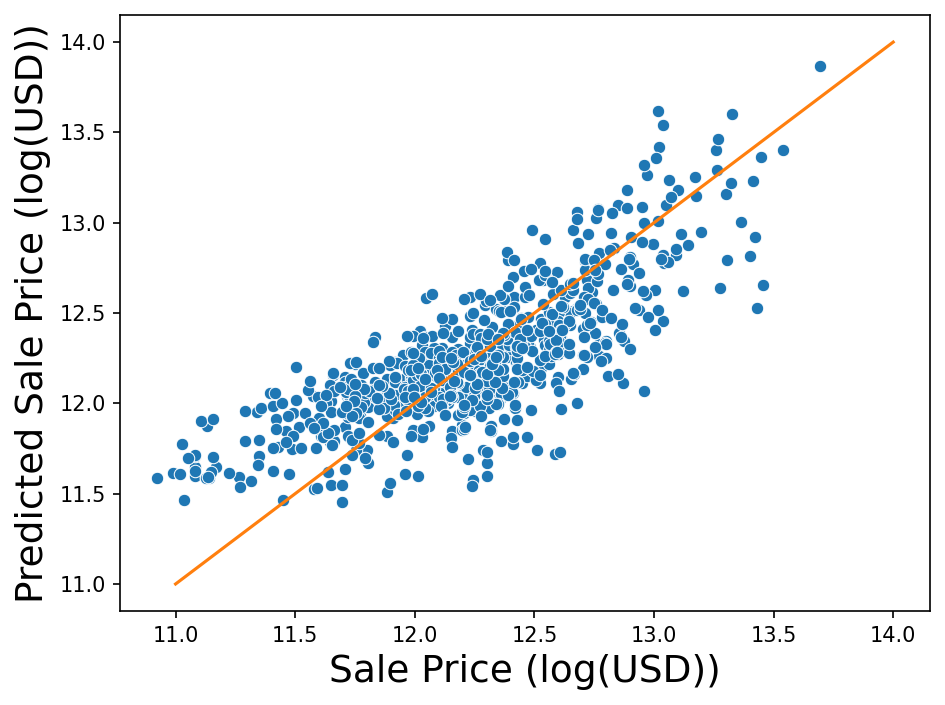

In [50]:
pred_y = results.predict(X)
pred_true_plot = sns.scatterplot(x=y.log_price, y=pred_y)
plt.pyplot.plot([11, 14], [11, 14], color="tab:orange")
pred_true_plot.set(xlabel="Sale Price (log(USD))", ylabel="Predicted Sale Price (log(USD))");
pred_true_plot.figure.savefig("log_true_vs_predicted_scatter.png")

And that cleaned up those two bad outliers.  Our linear predictor ability does appear to break down for the less expensive houses.

In [51]:
mse = mean_squared_error(y.log_price, pred_y)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y.log_price, pred_y)
print(f"RMSE (USD): ${np.exp(rmse):,.2f}, MAPE: {mape:.1%}")

RMSE (USD): $1.35, MAPE: 2.0%


Our error and percentage look much better.  However, it seems so low that I am guessing there is a mathematical problem with doing the analysis this way.

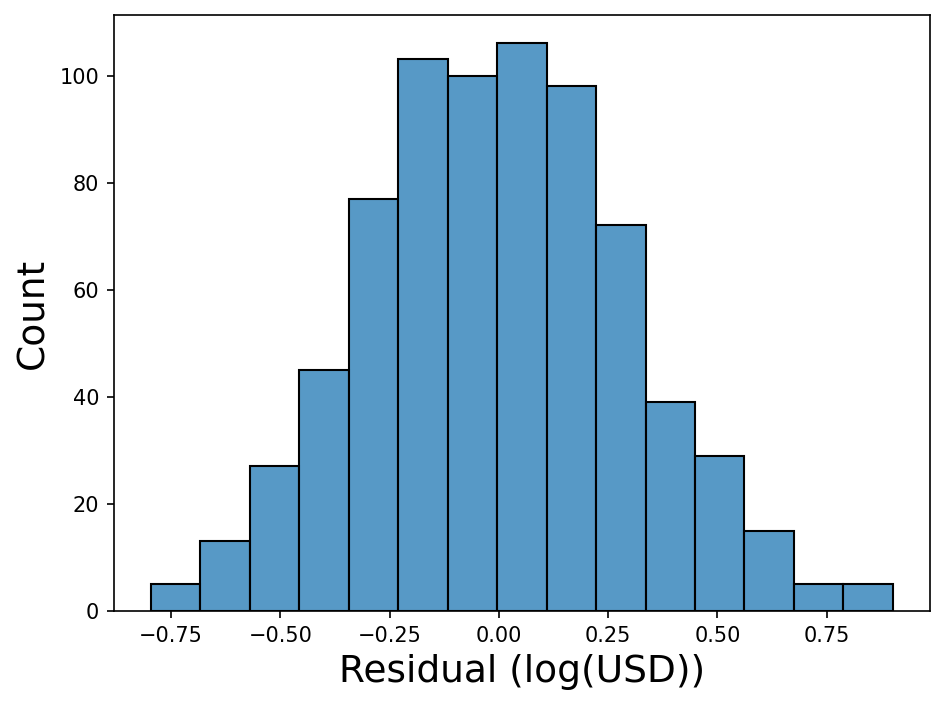

In [52]:
residuals_hist_plot = sns.histplot(x=results.resid, bins=15)
residuals_hist_plot.set(xlabel="Residual (log(USD))", ylabel="Count");
residuals_hist_plot.figure.savefig("log_residual_histogram.png")

And this looks like an excellent normal distribution.

In [53]:
scipy.stats.shapiro(results.resid)

ShapiroResult(statistic=0.9975786805152893, pvalue=0.3584468364715576)

Our p-value indicates we cannot reject the null hypothesis (mean our data is normally distributed).

In [54]:
np.mean(results.resid)

-7.123359187129995e-13

Our mean error is very close to zero.

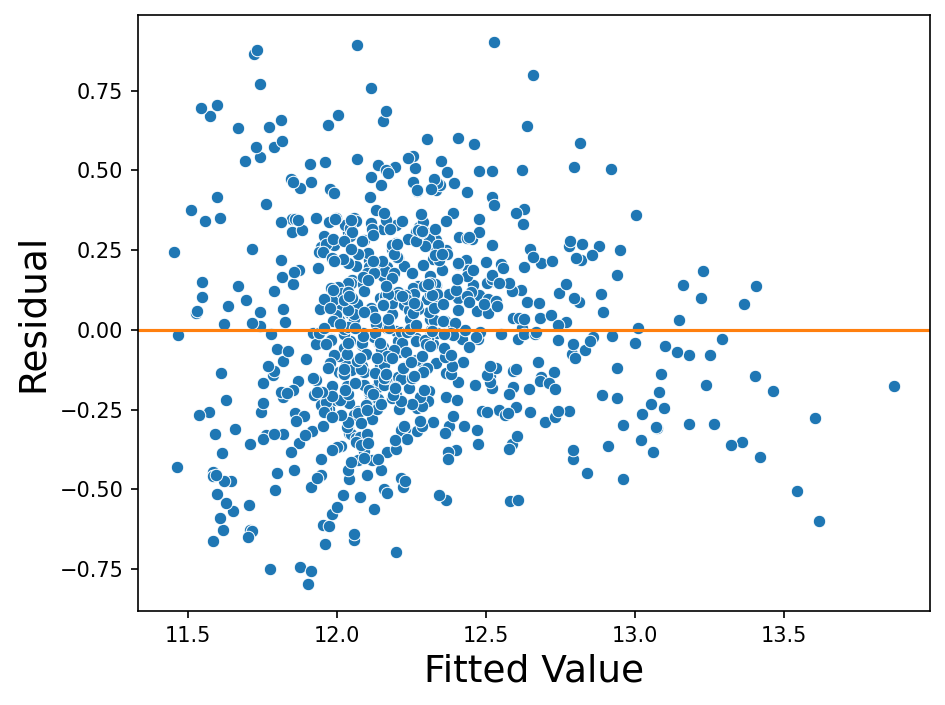

In [55]:
residuals_fit_plot = sns.scatterplot(x=results.fittedvalues, y=results.resid)
plt.pyplot.axhline(y=0, color="tab:orange")
residuals_fit_plot.set(xlabel="Fitted Value", ylabel="Residual");
residuals_fit_plot.figure.savefig("log_fitted_vs_residual_scatter.png")

Our scatter plot of fitted value to residual looks much better now.  It is more dense for lower fitted values but that is just because our sample size was so much larger for more inexpensive houses than it was for very expensive houses.

# Linear Regression Model - Price (Attempt 2)

After doing the previous analysis, we were instructed to start from just using price vs. thousands of square feet.  Note that I am going back and doing this analysis without deleting the first two passes I performed before the change.

In [56]:
y, X = patsy.dmatrices("price ~ sq__ft_k - 1", data=df, return_type="dataframe")
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              8937.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):                        0.00
Time:                        20:49:42   Log-Likelihood:                         -10010.
No. Observations:                 794   AIC:                                  2.002e+04
Df Residuals:                     793   BIC:                                  2.003e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sq__ft_k    1.415e+05   1497.282     94.534      0.000    1.39e+05    1.44e+05
==============================================================================
Omnibus:                      121.386   Durbin-Watson:                   1.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.151
Skew:                           0.890   Prob(JB):                     4.31e-53
Kurtosis:                       5.030   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

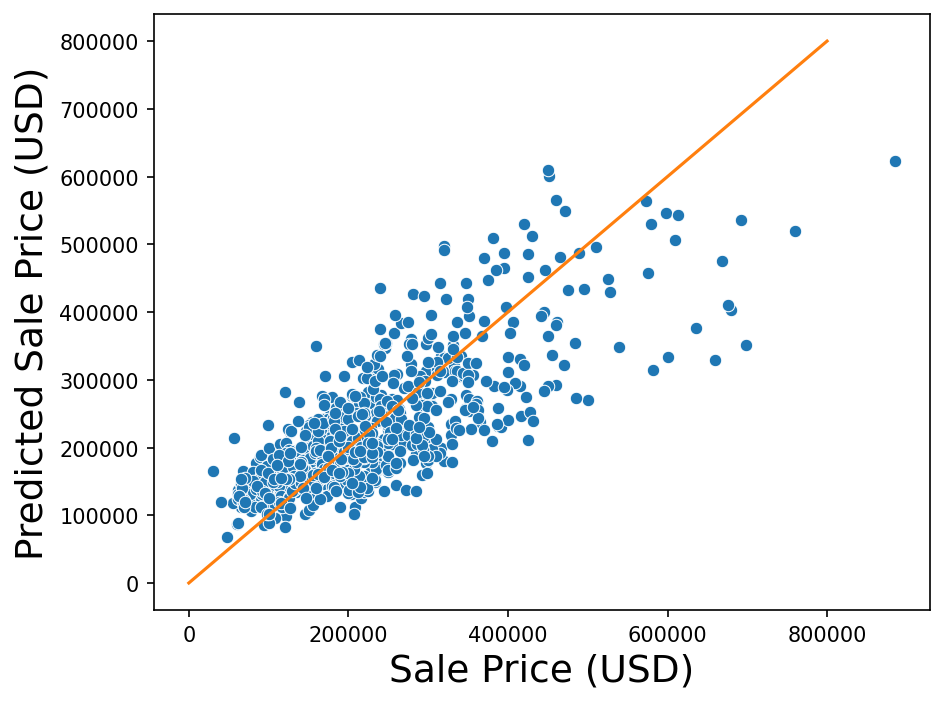

In [57]:
pred_y = results.predict(X)
pred_true_plot = sns.scatterplot(x=y.price, y=pred_y)
plt.pyplot.plot([0, 800000], [0, 800000], color="tab:orange")
pred_true_plot.set(xlabel="Sale Price (USD)", ylabel="Predicted Sale Price (USD)");

In [58]:
mse = mean_squared_error(y.price, pred_y)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y.price, pred_y)
print(f"RMSE (USD): ${rmse:,.2f}, MAPE: {mape:.1%}")

RMSE (USD): $72,232.54, MAPE: 28.4%


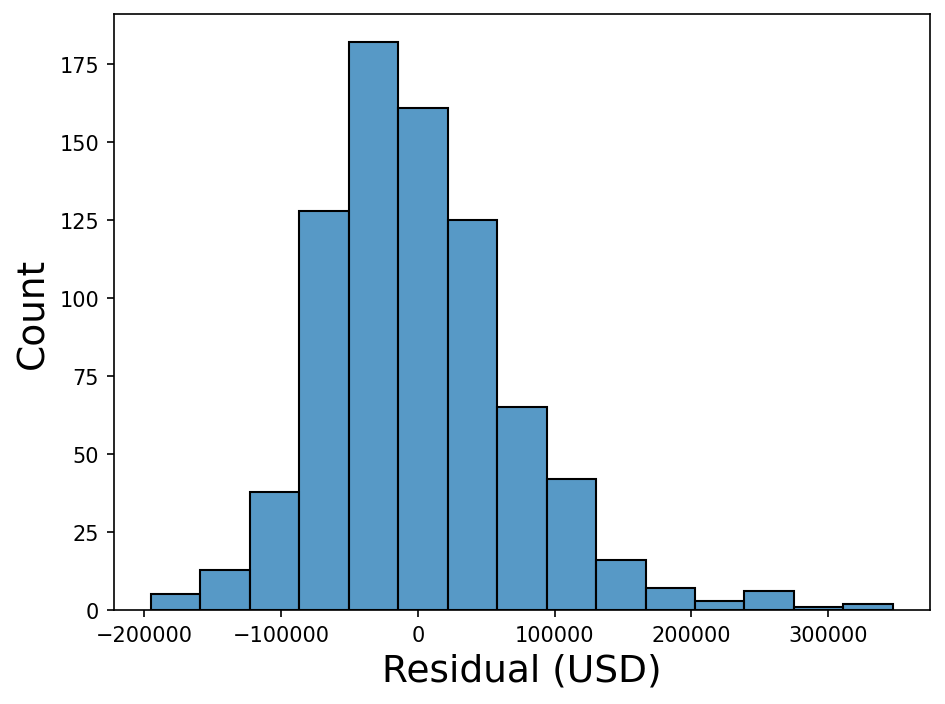

In [59]:
residuals_hist_plot = sns.histplot(x=results.resid, bins=15)
residuals_hist_plot.set(xlabel="Residual (USD)", ylabel="Count");

In [60]:
scipy.stats.shapiro(results.resid)

ShapiroResult(statistic=0.959646463394165, pvalue=5.667968739210376e-14)

In [61]:
np.mean(results.resid)

807.9208584606532

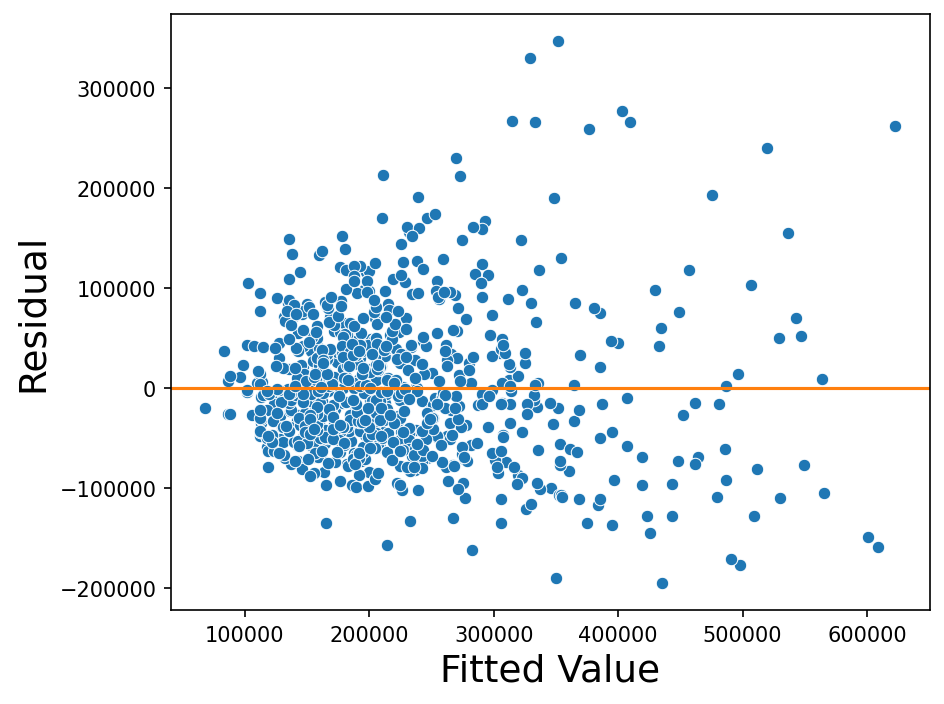

In [62]:
residuals_fit_plot = sns.scatterplot(x=results.fittedvalues, y=results.resid)
plt.pyplot.axhline(y=0, color="tab:orange")
residuals_fit_plot.set(xlabel="Fitted Value", ylabel="Residual");

## Summary of Analysis

This method produced an adjusted R-squared value of 0.918 (better), a low condition number (1), passed the F-test.  As far as fitness, it has a linear relationship, RMSE (USD): $72,232.54, MAPE: 28.4%, still has a skewed distribution, rejects the null hypothesis for normality from the Shapiro test, has a non-zero mean residual, and has a residual that increases as our fitted value increases.

# Linear Regression Model - Price (Attempt 3)

Let us find some extra independent variables to add to the regression.  We may also have to filter out the more expensive houses.  The log based analysis could redue the error in larger fitted values but I couldn't interpret the data correctly.

With just thousands of square feet:

In [63]:
y, X = patsy.dmatrices("price ~ sq__ft_k", data=df, return_type="dataframe")
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     1216.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          3.88e-162
Time:                        20:49:43   Log-Likelihood:                -10009.
No. Observations:                 794   AIC:                         2.002e+04
Df Residuals:                     792   BIC:                         2.003e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5681.9313   6803.662      0.835      0.404   -7673.411     1.9e+04
sq__ft_k    1.385e+05   3971.458     34.867      0.000    1.31e+05    1.46e+05
==============================================================================
Omnibus:                      132.174   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.903
Skew:                           0.948   Prob(JB):                     1.49e-59
Kurtosis:                       5.143   Cond. No.                         5.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Excluding the intercept:

In [64]:
y, X = patsy.dmatrices("price ~ sq__ft_k - 1", data=df, return_type="dataframe")
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              8937.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):                        0.00
Time:                        20:49:43   Log-Likelihood:                         -10010.
No. Observations:                 794   AIC:                                  2.002e+04
Df Residuals:                     793   BIC:                                  2.003e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sq__ft_k    1.415e+05   1497.282     94.534      0.000    1.39e+05    1.44e+05
==============================================================================
Omnibus:                      121.386   Durbin-Watson:                   1.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.151
Skew:                           0.890   Prob(JB):                     4.31e-53
Kurtosis:                       5.030   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding just beds:

In [65]:
y, X = patsy.dmatrices("price ~ sq__ft_k + beds - 1", data=df, return_type="dataframe")
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                              4489.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):                        0.00
Time:                        20:49:43   Log-Likelihood:                         -10007.
No. Observations:                 794   AIC:                                  2.002e+04
Df Residuals:                     792   BIC:                                  2.003e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sq__ft_k    1.529e+05   5642.536     27.093      0.000    1.42e+05    1.64e+05
beds       -5995.0024   2879.643     -2.082      0.038   -1.16e+04    -342.368
==============================================================================
Omnibus:                      102.850   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.718
Skew:                           0.779   Prob(JB):                     7.06e-44
Kurtosis:                       4.891   Cond. No.                         9.22
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding just baths:

In [66]:
y, X = patsy.dmatrices("price ~ sq__ft_k + baths - 1", data=df, return_type="dataframe")
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              4463.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):                        0.00
Time:                        20:49:43   Log-Likelihood:                         -10010.
No. Observations:                 794   AIC:                                  2.002e+04
Df Residuals:                     792   BIC:                                  2.003e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sq__ft_k     1.43e+05   5735.857     24.936      0.000    1.32e+05    1.54e+05
baths      -1273.3537   4745.071     -0.268      0.788   -1.06e+04    8041.049
==============================================================================
Omnibus:                      119.522   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.366
Skew:                           0.880   Prob(JB):                     4.72e-52
Kurtosis:                       5.012   Cond. No.                         7.66
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding just latitude:

In [67]:
y, X = patsy.dmatrices("price ~ sq__ft_k + latitude - 1", data=df, return_type="dataframe")
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              4467.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):                        0.00
Time:                        20:49:43   Log-Likelihood:                         -10009.
No. Observations:                 794   AIC:                                  2.002e+04
Df Residuals:                     792   BIC:                                  2.003e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sq__ft_k    1.383e+05   3967.758     34.858      0.000    1.31e+05    1.46e+05
latitude     155.1626    176.208      0.881      0.379    -190.727     501.052
==============================================================================
Omnibus:                      132.754   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.583
Skew:                           0.951   Prob(JB):                     6.45e-60
Kurtosis:                       5.150   Cond. No.                         59.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding just longitude:

In [68]:
y, X = patsy.dmatrices("price ~ sq__ft_k + longitude - 1", data=df, return_type="dataframe")
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              4467.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):                        0.00
Time:                        20:49:43   Log-Likelihood:                         -10009.
No. Observations:                 794   AIC:                                  2.002e+04
Df Residuals:                     792   BIC:                                  2.003e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sq__ft_k    1.385e+05   3970.426     34.895      0.000    1.31e+05    1.46e+05
longitude    -45.6572     56.037     -0.815      0.415    -155.656      64.342
==============================================================================
Omnibus:                      131.909   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.138
Skew:                           0.947   Prob(JB):                     2.19e-59
Kurtosis:                       5.140   Cond. No.                         188.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding beds, baths, latitude, and longitude:

In [69]:
y, X = patsy.dmatrices("price ~ sq__ft_k + beds + baths + latitude + longitude - 1", data=df, return_type="dataframe")
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              1943.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):                        0.00
Time:                        20:49:43   Log-Likelihood:                         -9977.2
No. Observations:                 794   AIC:                                  1.996e+04
Df Residuals:                     789   BIC:                                  1.999e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sq__ft_k    1.547e+05   6284.428     24.620      0.000    1.42e+05    1.67e+05
beds       -1.682e+04   4404.139     -3.819      0.000   -2.55e+04   -8175.859
baths       1543.1643   5686.760      0.271      0.786   -9619.805    1.27e+04
latitude    1.232e+05   1.78e+04      6.938      0.000    8.83e+04    1.58e+05
longitude   3.888e+04   5648.352      6.884      0.000    2.78e+04       5e+04
==============================================================================
Omnibus:                      125.398   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.611
Skew:                           0.885   Prob(JB):                     1.73e-59
Kurtosis:                       5.247   Cond. No.                         962.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With those but removing baths (bad p-value):

In [70]:
y, X = patsy.dmatrices("price ~ sq__ft_k + beds + latitude + longitude - 1", data=df, return_type="dataframe")
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              2431.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):                        0.00
Time:                        20:49:43   Log-Likelihood:                         -9977.3
No. Observations:                 794   AIC:                                  1.996e+04
Df Residuals:                     790   BIC:                                  1.998e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sq__ft_k    1.556e+05   5475.924     28.408      0.000    1.45e+05    1.66e+05
beds       -1.649e+04   4228.507     -3.900      0.000   -2.48e+04   -8188.823
latitude    1.232e+05   1.77e+04      6.944      0.000    8.84e+04    1.58e+05
longitude   3.888e+04   5645.035      6.888      0.000    2.78e+04       5e+04
==============================================================================
Omnibus:                      125.111   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.721
Skew:                           0.883   Prob(JB):                     2.70e-59
Kurtosis:                       5.243   Cond. No.                         961.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding back in baths but also adding computed beds_t_baths:

In [71]:
y, X = patsy.dmatrices("price ~ sq__ft_k + beds + baths + beds_t_baths + latitude + longitude - 1", data=df, return_type="dataframe")
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              1657.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):                        0.00
Time:                        20:49:43   Log-Likelihood:                         -9968.2
No. Observations:                 794   AIC:                                  1.995e+04
Df Residuals:                     788   BIC:                                  1.998e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sq__ft_k      1.606e+05   6366.694     25.222      0.000    1.48e+05    1.73e+05
beds          1.241e+04   8116.630      1.528      0.127   -3527.578    2.83e+04
baths         5.451e+04   1.36e+04      4.000      0.000    2.78e+04    8.13e+04
beds_t_baths -1.582e+04   3707.472     -4.268      0.000   -2.31e+04   -8544.881
latitude      1.221e+05   1.76e+04      6.952      0.000    8.76e+04    1.57e+05
longitude     3.938e+04   5588.935      7.046      0.000    2.84e+04    5.03e+04
==============================================================================
Omnibus:                      144.694   Durbin-Watson:                   1.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.170
Skew:                           0.966   Prob(JB):                     1.51e-76
Kurtosis:                       5.612   Cond. No.                         963.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

And adding in the computed beds_m_baths:

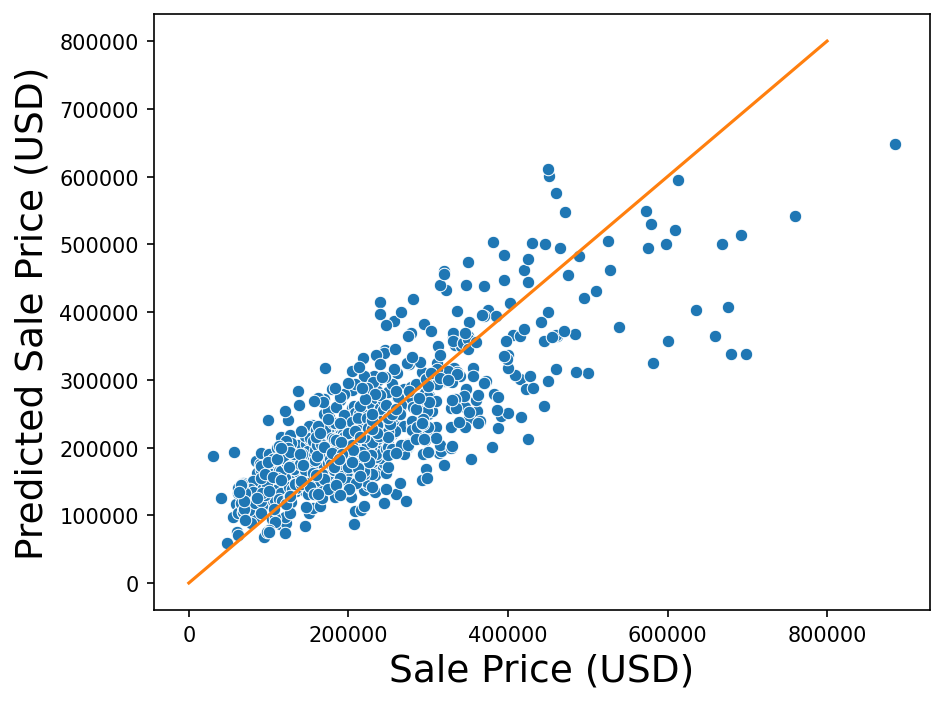

In [72]:
pred_y = results.predict(X)
pred_true_plot = sns.scatterplot(x=y.price, y=pred_y)
plt.pyplot.plot([0, 800000], [0, 800000], color="tab:orange")
pred_true_plot.set(xlabel="Sale Price (USD)", ylabel="Predicted Sale Price (USD)");

In [73]:
mse = mean_squared_error(y.price, pred_y)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y.price, pred_y)
print(f"RMSE (USD): ${rmse:,.2f}, MAPE: {mape:.1%}")

RMSE (USD): $68,558.28, MAPE: 27.1%


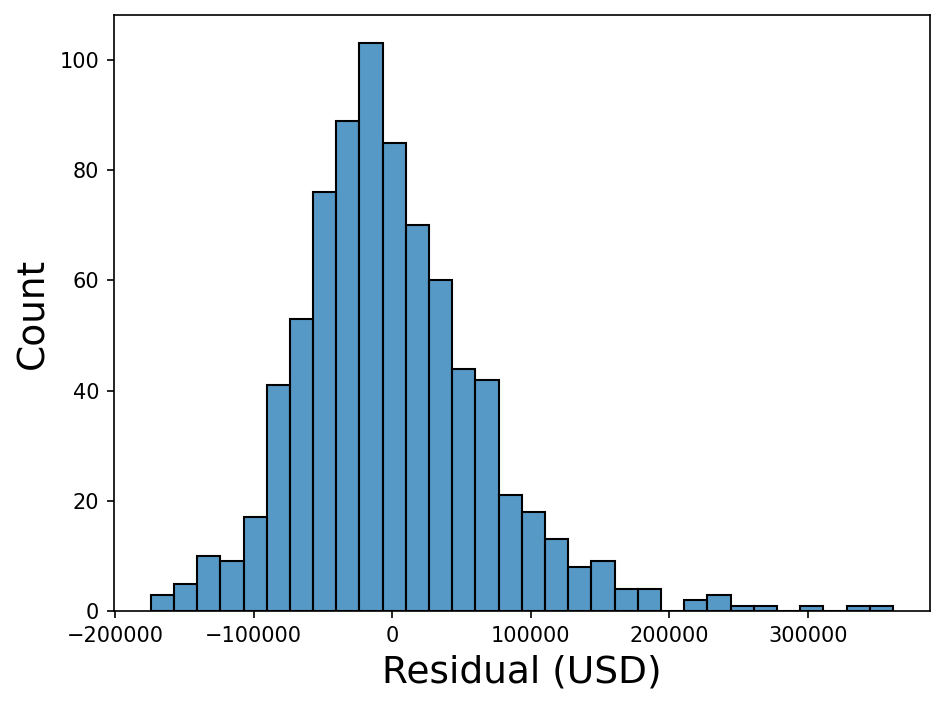

In [74]:
residuals_hist_plot = sns.histplot(x=results.resid)
residuals_hist_plot.set(xlabel="Residual (USD)", ylabel="Count");

In [75]:
outliers = results.resid > 200000
df[outliers]

,index,address,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,sq__ft_k,beds_t_baths,beds_m_baths
393,156,4004 CRESTA WAY,SACRAMENTO,95864,CA,3,3,2325,Residential,2008-05-21,660000,38.591618,-121.370626,2.325,9,0
406,333,1409 47TH ST,SACRAMENTO,95819,CA,5,2,2484,Residential,2008-05-20,699000,38.563244,-121.446876,2.484,10,3
408,834,51 AIKEN WAY,SACRAMENTO,95819,CA,3,1,1493,Residential,2008-05-16,425000,38.579326,-121.442520,1.493,3,2
675,329,5709 RIVER OAK WAY,CARMICHAEL,95608,CA,4,2,2222,Residential,2008-05-20,582000,38.602461,-121.330979,2.222,8,2
711,548,104 CATLIN CT,FOLSOM,95630,CA,4,3,2660,Residential,2008-05-19,636000,38.684459,-121.145935,2.660,12,1
727,864,9401 BARREL RACER CT,WILTON,95693,CA,4,3,4400,Residential,2008-05-16,884790,38.415298,-121.194858,4.400,12,1
732,332,4128 HILL ST,FAIR OAKS,95628,CA,5,5,2846,Residential,2008-05-20,680000,38.641670,-121.262099,2.846,25,0
790,550,4629 DORCHESTER LN,GRANITE BAY,95746,CA,5,3,2896,Residential,2008-05-19,676200,38.723545,-121.216025,2.896,15,2
791,553,6222 CALLE MONTALVO CIR,GRANITE BAY,95746,CA,5,3,3670,Residential,2008-05-19,760000,38.779435,-121.146676,3.670,15,2
792,858,620 KESWICK CT,GRANITE BAY,95746,CA,4,3,2356,Residential,2008-05-16,600000,38.732096,-121.219142,2.356,12,1


In [76]:
filtered_df = df[~outliers]
y, X = patsy.dmatrices("price ~ sq__ft_k + beds + baths + beds_t_baths + latitude + longitude - 1", data=filtered_df, return_type="dataframe")
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              1910.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):                        0.00
Time:                        20:49:43   Log-Likelihood:                         -9754.9
No. Observations:                 784   AIC:                                  1.952e+04
Df Residuals:                     778   BIC:                                  1.955e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sq__ft_k      1.524e+05   5884.675     25.905      0.000    1.41e+05    1.64e+05
beds          2.084e+04   7452.801      2.797      0.005    6212.697    3.55e+04
baths         6.698e+04   1.24e+04      5.396      0.000    4.26e+04    9.13e+04
beds_t_baths -2.002e+04   3435.860     -5.828      0.000   -2.68e+04   -1.33e+04
latitude      1.031e+05   1.58e+04      6.503      0.000    7.19e+04    1.34e+05
longitude     3.345e+04   5040.815      6.635      0.000    2.36e+04    4.33e+04
==============================================================================
Omnibus:                       32.202   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.142
Skew:                           0.496   Prob(JB):                     2.34e-08
Kurtosis:                       3.305   Cond. No.                         966.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

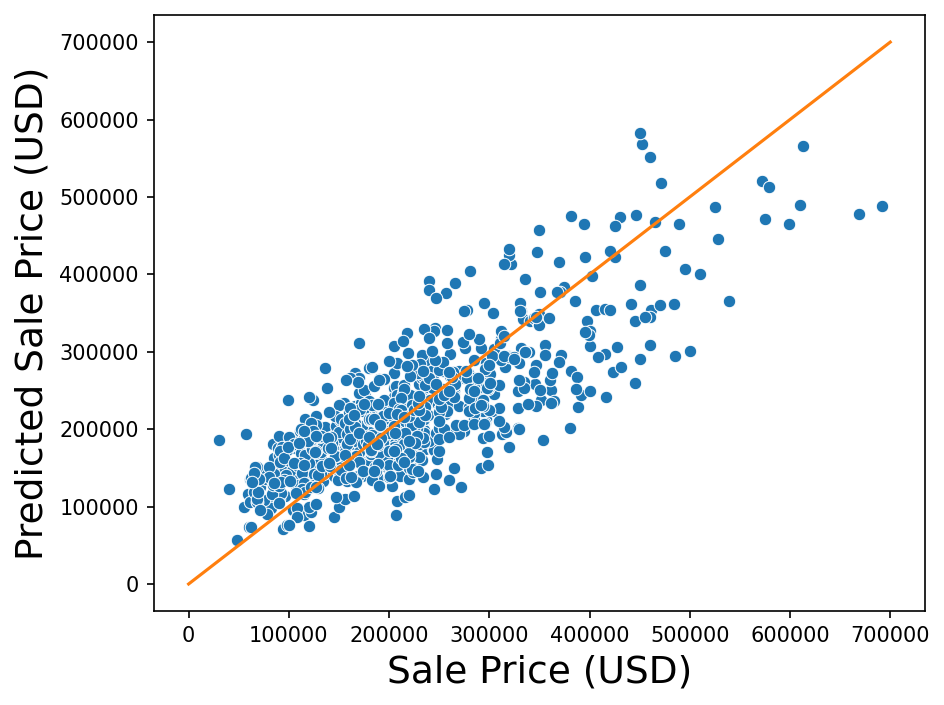

In [77]:
pred_y = results.predict(X)
pred_true_plot = sns.scatterplot(x=y.price, y=pred_y)
plt.pyplot.plot([0, 700000], [0, 700000], color="tab:orange")
pred_true_plot.set(xlabel="Sale Price (USD)", ylabel="Predicted Sale Price (USD)");
pred_true_plot.figure.savefig("true_vs_predicted_scatter.png")

In [78]:
mse = mean_squared_error(y.price, pred_y)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y.price, pred_y)
print(f"RMSE (USD): ${rmse:,.2f}, MAPE: {mape:.1%}")

RMSE (USD): $61,297.26, MAPE: 26.5%


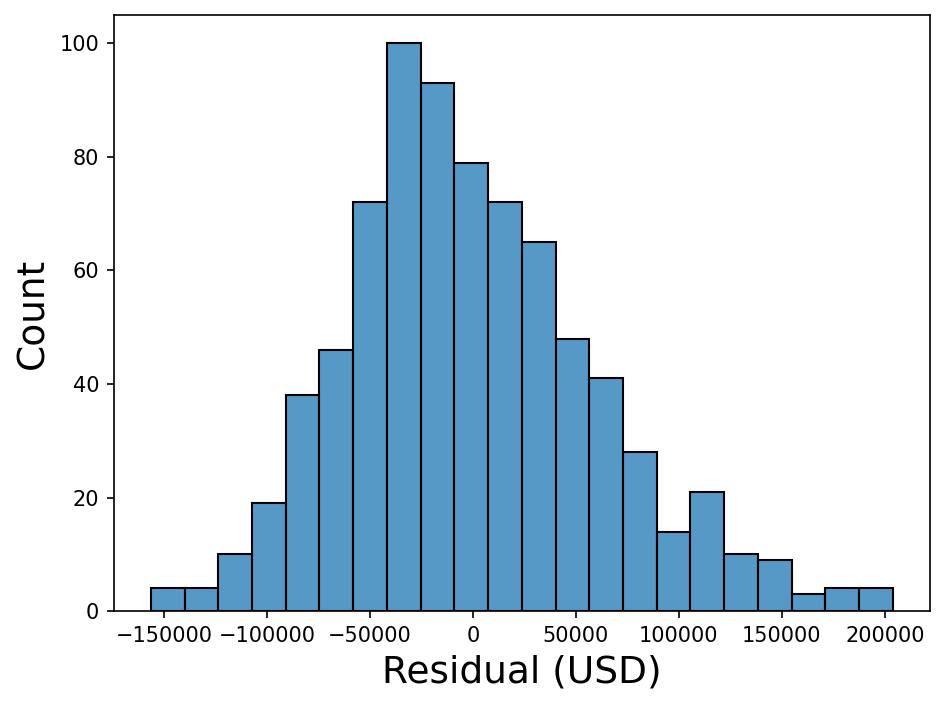

In [79]:
residuals_hist_plot = sns.histplot(x=results.resid)
residuals_hist_plot.set(xlabel="Residual (USD)", ylabel="Count");
residuals_hist_plot.figure.savefig("residual_histogram.png")

In [80]:
scipy.stats.shapiro(results.resid)

ShapiroResult(statistic=0.9838581085205078, pvalue=1.331245016444882e-07)

In [81]:
np.mean(results.resid)

9.555655720782685

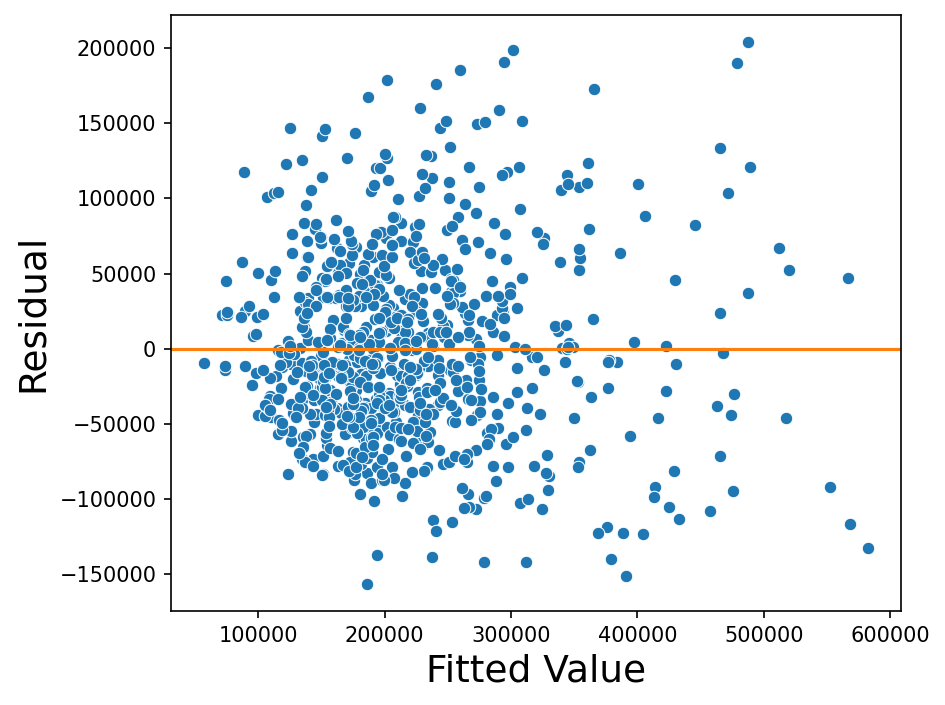

In [82]:
residuals_fit_plot = sns.scatterplot(x=results.fittedvalues, y=results.resid)
plt.pyplot.axhline(y=0, color="tab:orange")
residuals_fit_plot.set(xlabel="Fitted Value", ylabel="Residual");
residuals_fit_plot.figure.savefig("fitted_vs_residual_scatter.png")

## Coefficient Analysis

### Beds and Baths

Since I introduced the `beds * baths` computed variable, I need to analyze beds and baths with respenct to each other.

```
20840 * beds + 66980 * baths - 20020 * beds * baths
```


In [83]:
def price_beds_baths(beds, baths):
    return 20840 * beds + 66980 * baths - 20020 * beds * baths

def price_change_beds_baths(old_beds, old_baths, new_beds, new_baths):
    old_price = price_beds_baths(old_beds, old_baths)
    new_price = price_beds_baths(new_beds, new_baths)
    return new_price - old_price

print("Adding a bathroom (up to 5)")
for beds in range(1, 7):
    print(f"{beds} bedroom(s): {price_change_beds_baths(beds, 0, beds, 1):.0f}")
print("")
print("Adding a bedroom (up to 6)")
for baths in range(1, 6):
    print(f"{baths} bathroom(s): {price_change_beds_baths(0, baths, 1, baths)}")


Adding a bathroom (up to 5)
1 bedroom(s): 46960
2 bedroom(s): 26940
3 bedroom(s): 6920
4 bedroom(s): -13100
5 bedroom(s): -33120
6 bedroom(s): -53140

Adding a bedroom (up to 6)
1 bathroom(s): 820
2 bathroom(s): -19200
3 bathroom(s): -39220
4 bathroom(s): -59240
5 bathroom(s): -79260


So you are better off adding an additional bathroom with dimishing returns based on the number of bedrooms.

### Square Footage

```
152,400 * thousand square feet
```

So every square foot adds an extra $152.40 to the sale price.

### Latitude and Longitude

```
103,100 * latitude
```

So an extra $103,100 for every degree of latitude North (within the boundaries of 38.2 to 39.0).

```
33,450 * longitude
```

So an extra $33,450 for every degree of longitude East (within the boundaries of -121.6 to -120.6).

Which is to say that the more North-East you are in the Sacramento area, the more expensive the homes are (all else being equal).